### Loss analysis of the ProcrastinatePRO+ application.

#### Project description.

With Procrastinate Pro+ entertainment application, despite huge investments in advertising, the company has been suffering losses for the last few months. The task is to understand the reasons and help the company to become a plus.
There is data on customers acquired from May 1 to October 27, 2019:
- server log with data on their visits,
- unloading of their purchases for this period,
- advertising costs.


Study:
- where users come from and what devices they use,
- how much does it cost to acquire customers from various advertising channels;
- how much money does each client bring,
- when the cost of acquiring a customer pays off,
- which factors prevent acquiring customers.

#### Data description

There are three datasets. The visits_info_short.csv file stores the server log with information about site visits, orders_info_short.csv — information about orders, and costs_info_short.csv — information about advertising expenses.

visits_info_short.csv structure:
- User Id — unique user ID,
- Region — user's country,
- Device — user's device type,
- Channel — ID of the transition source,
- Session Start — date and time of the session start,
- Session End — date and time of the end of the session.

orders_info_short.csv structure:
- User Id — unique user ID,
- Event Dt — date and time of purchase,
- Revenue — the amount of the order.

costs_info_short.csv structure:
- dt — date of the advertising campaign,
- Channel — the identifier of the advertising source,
- costs — expenses for this campaign.

### Loading the data and preparations for analysis.

We will upload data about visits, orders, and advertising expenses from CSV files to variables.

Then we'll examine the data and perform preprocessing, check if there are any omissions and duplicates in the data. 

In [1]:
# importing the libraries needed for work

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt 
import seaborn as sns
import os

In [2]:
# let's define the file search function in Linux and Windows folders (if the notebook works locally)

def file_path(name):
    # reading a data file with an attempt to take data locally: 4 attempts for the Ya-server and Windows
    # the file should be located next to the notebook or in the nested directory "datasets" 

    for p in ('/datasets', '', os.path.abspath(""), os.path.abspath("")+'\\datasets\\'):
        pth1 = os.path.join(p, name)
        if os.path.exists(pth1):
            break # if the search is successful - break the cycle ahead of schedule
    else:
        pth1 = ''
        print(f'The file {name} was not found. Check its name and make sure it', 
              'it is present in the directory next to the notebook or in a subfolder "/datasets"')
    print('Reading data from:', pth1, '\n')
    return pth1


# reading 3 data files
name = 'visits_info_short.csv'           # session log   
sessions = pd.read_csv(file_path(name))  # writing data file to the dataframe  

name = 'orders_info.csv'                 # purchases   
orders = pd.read_csv(file_path(name))    # writing data file to the dataframe 

name = 'costs_info_short.csv'            # ad costs    
costs = pd.read_csv(file_path(name))     # writing data file to the dataframe 

Reading data from: visits_info_short.csv 

Reading data from: orders_info.csv 

Reading data from: costs_info_short.csv 



In [3]:
frames_list = [sessions, orders, costs]  # list of 3 dataframes
frames_names = ['sessions', 'orders', 'costs'] # also put their names on the list

In [4]:
for i in range(3):    # check for the number of passes
    display(frames_names[i], frames_list[i].isna().sum())

'sessions'

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

'orders'

User Id     0
Event Dt    0
Revenue     0
dtype: int64

'costs'

dt         0
Channel    0
costs      0
dtype: int64

In [5]:
for i in range(3):    # check if there are duplicates
    display(frames_names[i], frames_list[i].duplicated().sum())

'sessions'

0

'orders'

0

'costs'

0

In [6]:
# for 3 dataframes, output first 5 lines (and take a closer look at the column names)

for i in range(3):
    display(frames_names[i], frames_list[i].head())

'sessions'

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

'orders'

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

'costs'

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [7]:
# there is a mess with the column names, rename then

frames_list[0].columns = ['user_id','region','device','channel','session_start','session_end']
frames_list[1].columns = ['user_id', 'event_dt', 'revenue']
frames_list[2].columns = ['dt', 'channel', 'costs']

for i in range(3):    # data types in each dataframe
    display(frames_names[i], frames_list[i].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


'sessions'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


'orders'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


'costs'

None

In [8]:
# translating the time strings (object class) into the "time" class

sessions['session_start'] = pd.to_datetime(sessions['session_start'])
sessions['session_end'] = pd.to_datetime(sessions['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date # here we will translate to the date

In [9]:
# in the date intervals, it can be seen that the expense records end 4 days before the end 
# sessions and someone's session on the last day ended at 1:38 a.m. - there are no anomalies

print(sessions['session_start'].min(), sessions['session_start'].max())
print(sessions['session_end'].min(), sessions['session_end'].max())
print(orders['event_dt'].min(), orders['event_dt'].max())
print(costs['dt'].min(), costs['dt'].max())

2019-05-01 00:00:41 2019-10-31 23:59:23
2019-05-01 00:07:06 2019-11-01 01:38:46
2019-05-01 00:28:11 2019-10-31 23:56:56
2019-05-01 2019-10-27


### Functions for calculating and analyzing TV, ROI, retention and conversion.

Functions for calculating metric values:

- `get_profiles()` — to create user profiles,
- `get_retention()` — to calculate Retention Rate,
- `get_conversion()` — to calculate conversion,
- `get_ltv()` — for calculating LTV.

Functions for plotting:

- `filter_data()' — for smoothing data,
- `plot_retention()' — for plotting Retention Rate,
- `plot_conversion()' — for plotting conversion,
- `plot_ltv_roi' — for LTV and ROI visualization.

#### get_profiles() function — 2 versions for creating user profiles.

In [10]:
# get_profiles() — functions for creating user profiles

def get_profiles(sessions): # 1st version, simplified, we use it in clause 3.1

    # sorting sessions by user ID and date of visit
    # group by ID and find the first values of session_start and channel
    # column with time of the first visit will be called first_ts

    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({'session_start': 'first', 'channel': 'first'})
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # returning user_id from the index
    )

    # we determine the date of the first visit and the
    # first day of the month in which this visit occurred
    # this data will be needed for cohort analysis
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    return profiles

In [11]:
# version 2 - full (we use it in clauses 3.2-3.4)

def get_profiles_2(sessions, orders, events, ad_costs, event_names=[]):

    # sorting sessions by user ID and engagement date
    # group by ID and find the parameters of the first visits
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # call the time of the first visit first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # returning user_id from the index
    )

    # for cohort analysis, we determine the date of the first visit
    # and the first day of the month in which this visit occurred
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # adding a sign of paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # adding flags for all events from event_names
    for event in event_names:
        if event in events['event_name'].unique():
            # check if each user is dating
            # among those who made the event
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # counting the number of unique users
    # with the same source and date of attraction (registration)
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # column with number of users will be called unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # returning dt and channel from the indexes
    )

    # combine spending on advertising and the number of attracted users
    # by date and channel of attraction
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # divide advertising expenses by the number of attracted users
    # we will save the results in the acquisition_cost (CAC) column
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # add the cost of attraction to the profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # organic users are not associated with advertising data,
    # therefore, in the acquisition_cost column they have the values NaN
    # replace them with zero, because the cost of attraction is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(
        0
    )
    
    return profiles  # returning profiles with CAC

#### Function get_conversion()  — for conversion calculation.

In [12]:
# get_conversion() — to count conversions

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # exclude users who have not "lived up" to the horizon of analysis
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # determine the date and time of the first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # adding data about purchases in the profile
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # calculate lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # group by cohort if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # function for grouping a table by desired attributes
    def group_by_dimensions(df, dims, horizon_days):
        # building a "triangular" conversion table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # calculate the cumulative amount for each row
        result = result.fillna(0).cumsum(axis = 1)
        # calculate cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # adding cohort sizes to the conversion table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # divide each "cell" in a row by the size of the cohort and get the conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # exclude all liftimes exceeding the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # restoring cohort sizes
        result['cohort_size'] = cohort_sizes
        return result

    # get the conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # for the conversion dynamics table, remove 'cohort' from dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # get a table of conversion dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # returning the both tables and raw data
    return result_raw, result_grouped, result_in_time

#### Function get_retention()  — for calculating Retention Rate.

In [13]:
# get_retention() — to calculate Retention Rate

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # adding the payer column to the dimensions list being passed
    dimensions = ['payer'] + dimensions

    # exclude users who have not "lived up" to the horizon of analysis
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # collect "raw" data to calculate retention
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # function for grouping a table by desired attributes
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get the retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # get the table of retention dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # returning the both tables and raw data
    return result_raw, result_grouped, result_in_time

#### Function get_ltv()  — for counting LTV.

In [14]:
# get_ltv() — to calculate LTV

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # exclude users who have not "lived up" to the horizon of analysis
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # adding data about purchases in the profile
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # calculate user's lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # group by cohort if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # grouping function by desired attributes
    def group_by_dimensions(df, dims, horizon_days):
        # building a "triangular" revenue table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # find the amount of revenue with accumulation
        result = result.fillna(0).cumsum(axis=1)
        # calculate the cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # combining cohort sizes and revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # counting LTV: divide each "cell" in a row by the size of the cohort
        result = result.div(result['cohort_size'], axis=0)
        # exclude all liftimes exceeding the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # restoring cohort sizes
        result['cohort_size'] = cohort_sizes

        # saving user data and CAC values to the dataframe,
        # adding parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # calculate average CAC according to the parameters from dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # counting ROI: dividing LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # deleting rows with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # restoring cohort sizes in the ROI table
        roi['cohort_size'] = cohort_sizes

        # adding CAC to the ROI table
        roi['cac'] = cac['cac']

        # in the final table we leave the cohort sizes, CAC
        # and ROI in lifetimes not exceeding the analysis horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # return the LTV and ROI tables
        return result, roi

    # get the LTV and ROI tables
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # for dynamics tables, we remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # get tables of LTV and ROI dynamics
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # raw data
        result_grouped,  # table of LTV
        result_in_time,  # dinamics LTV table
        roi_grouped,  # ROI table
        roi_in_time,  # ROI dinamics table
    )

#### Function filter_data()  — for smoothing data.

In [15]:
# filter_data() — to smooth data

def filter_data(df, window):
    # using a moving average for each column
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Function plot_conversion()  — for plotting conversion.

In [16]:
# plot_conversion() — to make graph of conversion

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # setting the grid size for graphs
    plt.figure(figsize=(15, 5))

    # exclude cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    # in the dynamics table, we leave only the necessary lifetime
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        : # [horizon - 1]   horizons - a list, not limited
    ]

    # first graph is conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('User conversion')

    # second graph is the conversion dynamics
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # columns of the pivot table will be all columns of index, except for the date
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    
    for hor in horizon:  # we modify it so that we can get a list of horizons
        filtered_data = conversion_history.pivot_table(
            index='dt', columns=columns, values=hor - 1, aggfunc='mean'
        )
        filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    jj = str(horizon).strip('][')
    plt.xlabel('Date of acquision')
    plt.title(f'User conversion dynamics on {jj}th day')  # modified

    plt.tight_layout()
    plt.show()

#### Function plot_retention()  - for plotting Retention Rate.

In [17]:
# plot_retention() — to make graph of Retention Rate

def plot_retention(retention, retention_history, horizon, window=7):

    # setting the grid size for graphs
    plt.figure(figsize=(15, 5))

    # exclude cohort sizes
    retention = retention.drop(columns=['cohort_size'])
    # in the dynamics table, we leave only the necessary lifetime
    retention_history = retention_history.drop(columns=['cohort_size'])[
       :  # [horizon - 1] there are several horizons, so we don't cut off the extra columns
    ]

    # first graph is retention curves
    ax1 = plt.subplot(1, 2, 1)
    retention.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('User retention')

    # second graph is retention dynamics 
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # columns of pivot table will be all the columns of index, except for the date
        name for name in retention_history.index.names if name not in ['dt']
    ]
    
    for hor in horizon:  # modify it so that we can get a list of horizons
        filtered_data = retention_history.pivot_table(
            index='dt', columns=columns, values=hor - 1, aggfunc='mean'
        )
        filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    jj = str(horizon).strip('][')
    plt.xlabel('Date of acquision')
    plt.title(f'Dynamics of user retention on {jj}th day')  # modified

    plt.tight_layout()
    plt.show()

#### Function plot_retention_3() - for plotting Retention Rate graphs without dynamics.

In [18]:
def plot_retention_3(profiles, sessions, date, horizon, size=(8, 15)):
    profiles_noorg = profiles.query('channel != "organic"')  # removing organic
    profiles_org = profiles.query('channel == "organic"')  # leaving only organic
    
    # setting the grid size for graphs
    plt.figure(figsize=size)

    # 1st graph, we get grouping by country for banner clients
    retention_raw, retention, retention_history = get_retention(
    profiles_noorg, sessions, date, horizon, dimensions=['region']
    )
    # exclude cohort sizes
    retention = retention.drop(columns=['cohort_size'])
    # retention curves are displayed in the cell №1
    ax1 = plt.subplot(3, 2, 1)
    retention.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of banner users')

    # 3rd graph, we get grouping by devices for banner clients
    retention_raw, retention, retention_history = get_retention(
    profiles_noorg, sessions, date, horizon, dimensions=['device']
    )
    # exclude cohort sizes
    retention = retention.drop(columns=['cohort_size'])
    # the retention curves are displayed in cell №3
    ax3 = plt.subplot(3, 2, 3)
    retention.T.plot(grid=True, ax=ax3)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of banner users')
    
    # 5th graph, we get grouping by channels for banner clients
    retention_raw, retention, retention_history = get_retention(
    profiles_noorg, sessions, date, horizon, dimensions=['channel']
    )
    # exclude cohort sizes
    retention = retention.drop(columns=['cohort_size'])
    # the retention curves are displayed in cell №5
    ax5 = plt.subplot(3, 2, 5)
    retention.T.plot(grid=True, ax=ax5)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of banner users')   
    
    # 2nd graph, we get a grouping by country for "organics"
    retention_raw, retention, retention_history = get_retention(
    profiles_org, sessions, date, horizon, dimensions=['region']
    )
    # exclude cohort sizes
    retention = retention.drop(columns=['cohort_size'])
    # the retention curves are displayed in cell №2
    ax2 = plt.subplot(3, 2, 2)
    retention.T.plot(grid=True, ax=ax2)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of banner users') 
    
    # 4th graph, we get a grouping by devices for "organics"
    retention_raw, retention, retention_history = get_retention(
    profiles_org, sessions, date, horizon, dimensions=['device']
    )
    # exclude cohort sizes
    retention = retention.drop(columns=['cohort_size'])
    # the retention curves are displayed in cell №4
    ax4 = plt.subplot(3, 2, 4)
    retention.T.plot(grid=True, ax=ax4)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of banner users') 
    
    # 6th graph, we get grouping by channels for "organics"
    retention_raw, retention, retention_history = get_retention(
    profiles_org, sessions, date, horizon, dimensions=['channel']
    )
    # exclude cohort sizes
    retention = retention.drop(columns=['cohort_size'])
    # the retention curves are displayed in cell №6
    ax6 = plt.subplot(3, 2, 6)
    retention.T.plot(grid=True, ax=ax6)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of banner users') 
    
    plt.tight_layout()
    plt.show()

#### Function plot_ltv_roi()  — for LTV and ROI visualization.

In [19]:
# plot_ltv_roi() — to plot LTV and ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=1):

    # setting the grid for drawing graphs
    plt.figure(figsize=(20, 20))

    # exclude cohort sizes from the ltv table
    ltv = ltv.drop(columns=['cohort_size'])
    # in the ltv dynamics table, we leave only the necessary lifetime
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # cost of attraction will be recorded in a separate frame
    cac_history = roi_history[['cac']]

    # exclude cohort sizes and cac from the roi table
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # in the roi dynamics table, we leave only the necessary lifetime
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # the first graph is ltv curves
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # the second graph is dynamics of ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # columns of pivot table will be all columns of index, except for the date
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Date of acquision')
    plt.title('Dynamics of LTV users on {}th day'.format(horizon))

    # third graph - dynamics of cac
    ax3 = plt.subplot(3, 2, 5, sharey=ax1)
    # columns of pivot table will be all columns of index, except for the date
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Date of attraction')
    plt.title('Dynamics of customers acquisition cost CAC')

    # fourth graph, roi curves
    ax4 = plt.subplot(3, 2, 3)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # fifth chart is the dynamics of roi
    ax5 = plt.subplot(3, 2, 4, sharey=ax4)
    # columns of pivot table will be all columns of index, except for the date
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
    plt.xlabel('Date of acquision')
    plt.title('ROI dynamics on {}th day'.format(horizon))

    plt.tight_layout()
    plt.show()

### Research data analysis.

- Create user profiles. Determine the minimum and maximum dates for attracting users.
- Find out which countries users come to the app from and which country accounts for the most paying users. Build a table showing the number of users and the share of payers from each country.
- Find out which devices are used by customers and which devices are preferred by paying users. Build a table showing the number of users and the percentage of payers for each device.
- Study the advertising sources of attraction and determine the channels from which the most paying users came. Build a table showing the number of users and the share of payers for each attraction channel.

#### Create customer profiles. Determine the minimum and maximum dates of customers acquiring.

In [20]:
profiles = get_profiles(sessions) # call the 1st (simple) version of this function
profiles.head()

user_id            first_ts     channel          dt      month
0    599326 2019-05-07 20:58:57    FaceBoom  2019-05-07 2019-05-01
1   4919697 2019-07-09 12:46:07    FaceBoom  2019-07-09 2019-07-01
2   6085896 2019-10-01 09:58:33     organic  2019-10-01 2019-10-01
3  22593348 2019-08-22 21:35:48  AdNonSense  2019-08-22 2019-08-01
4  31989216 2019-10-02 00:07:44     YRabbit  2019-10-02 2019-10-01

<a id="cell21"></a>

<a id="cell21"></a>

In [21]:
# split profiles according to the channels of aquisition

prof_chan = (profiles.groupby('channel').agg({'user_id': 'nunique'}) 
.sort_values(by='user_id', ascending=False).reset_index()
.rename({'user_id':'number'}, axis='columns'))

prof_chan['%']= round(100 * prof_chan['number'] / prof_chan['number'].sum(), 2) # adding %

display(prof_chan)
print('Total customers for the period: ', prof_chan['number'].sum()) # number of customers

channel  number      %
0              organic   56439  37.62
1             FaceBoom   29144  19.43
2               TipTop   19561  13.04
3   OppleCreativeMedia    8605   5.74
4              LeapBob    8553   5.70
5       WahooNetBanner    8553   5.70
6       RocketSuperAds    4448   2.97
7         MediaTornado    4364   2.91
8              YRabbit    4312   2.87
9           AdNonSense    3880   2.59
10      lambdaMediaAds    2149   1.43

Total customers for the period:  150008


In [22]:
# once again display the initial intervals of sessions, orders and payments for advertising

print('Sessions:',sessions['session_start'].min(),'-', sessions['session_start'].max())
print('Orders:',orders['event_dt'].min(), '-', orders['event_dt'].max())
print('Ads:',costs['dt'].min(), '-', costs['dt'].max())

Sessions: 2019-05-01 00:00:41 - 2019-10-31 23:59:23
Orders: 2019-05-01 00:28:11 - 2019-10-31 23:56:56
Ads: 2019-05-01 - 2019-10-27


In [23]:
# display the start and end of time interval for customers acquisition

print('Acquisitions:', profiles['first_ts'].min(),'-', profiles['first_ts'].max())

Acquisitions: 2019-05-01 00:00:41 - 2019-10-27 23:59:04


___Conclusions on user profiles (without identifying payers):___
- the first session in the dataframe (2019-05-01 00:00:41) is a new client 
- sessions of new clients end on the same day as spending on advertising stops (2019-10-27), and there are no new sessions in the dataframe for the 4 remaining days
- total new users during the study period - 150008
- almost 38% of them come by themselves (organic channel)
- Facebook channel is on the 2nd place, it gives a stream of ~20%, on the 3rd TipTop ~13%, the 10th AdNonSense and lambda Media Ads are closing with streams of 1.5-2.5%.

#### Find out which countries' users come to the app from and which country accounts for the most paying users. Build a table showing the number of users and the share of payers from each country.

In [24]:
# call function ver. 2 of the get_profiles function and build full user profiles

profiles_full = get_profiles_2(sessions, orders, [], costs, event_names=[])
profiles_full.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

In [25]:
#  To separate users by countries, we will write a report function, which we'll use later in 3.3 & 3.4.

def sheet_gen(dim, prt=True):
    user_total = (profiles_full.groupby(dim) # all users by dim (regions, devices, etc.)
              .agg({'user_id':'nunique'})
              .reset_index())

    user_payer = (profiles_full.query('payer == True') # paying customers by dim
              .groupby(dim)
              .agg({'user_id':'nunique'})
              .reset_index())

    table = (user_total.merge(user_payer, on=dim) # combine tables by the dim column
         .rename(columns={'user_id_x': 'total','user_id_y': 'payers'})) # give the columns clear names

    table['pay_%'] = round((100 * table['payers'] / table['total']), 2)  # share payers
    table['share'] = round((100 * table['total'] / table['total'].sum()), 2)  # share dim
    df = table.sort_values(by='payers', ascending=False) # sort in descending order of payers
 
    if prt: # may print, or may only get a table
        print(f'Result table, grouping on: {dim} \n\n', df.to_string(index=False)) # cut off indexes 
    return df  # from this table, columns can be added to others
    
    
sheet_gen(dim='region');  # calling function to print the report 

Result table, grouping on: region 

        region  total  payers  pay_%  share
United States 100002    6902   6.90  66.66
           UK  17575     700   3.98  11.72
       France  17450     663   3.80  11.63
      Germany  14981     616   4.11   9.99


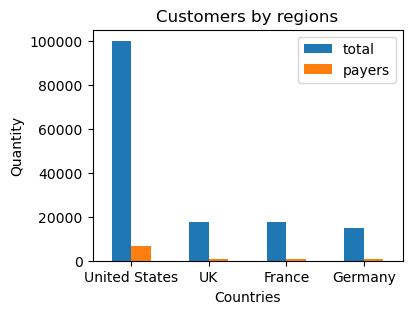

In [26]:
# add a visualization of the number of users and payers on a bar chart

yy = sheet_gen(dim='region',prt=False).set_index('region')[['total','payers']]

yy.plot(kind='bar',figsize=(4, 3))
plt.xticks(rotation = 0)
plt.title('Customers by regions')
plt.ylabel('Quantity')
plt.xlabel('Countries')
plt.show();

___Conclusions upon countries and payers:___
- 2/3 of clients are in the USA
- the number of users from England, France and Germany is approximately the same (11% each) and in total gives the remaining 1/3
- the share of paying customers in the USA is also much larger and is ~7% versus ~4% for other countries
- the number of payers in the USA is about 10 times more than the number of payers in each of the other countries.

#### Find out which devices are used by customers and which devices are preferred by paying users. Build a table showing the number of users and the percentage of payers for each device.

In [27]:
sheet_gen(dim='device');  # call function to output the report 

Result table, grouping on: device 

  device  total  payers  pay_%  share
 iPhone  54479    3382   6.21  36.32
Android  35032    2050   5.85  23.35
    Mac  30042    1912   6.36  20.03
     PC  30455    1537   5.05  20.30


___Conclusions by devices:___
- ~36% of users use iPhone, Android is in 2nd place and occupies 23%, Mac and PC respectively by ~20%
- for payers, the iPhone has 6.21% (this is the 2nd place), and the Mac is in 1st place with a 6.36% payer share.

#### Study the advertising sources of acquisition and determine the channels from which the most paying customers came. Build a table showing the number of users and the share of payers for each acquisition channel.

In [28]:
sheet_gen(dim='channel');  # вызываем функцию для вывода отчёта

Result table, grouping on: channel 

            channel  total  payers  pay_%  share
          FaceBoom  29144    3557  12.20  19.43
            TipTop  19561    1878   9.60  13.04
           organic  56439    1160   2.06  37.62
    WahooNetBanner   8553     453   5.30   5.70
        AdNonSense   3880     440  11.34   2.59
    RocketSuperAds   4448     352   7.91   2.97
           LeapBob   8553     262   3.06   5.70
OppleCreativeMedia   8605     233   2.71   5.74
    lambdaMediaAds   2149     225  10.47   1.43
           YRabbit   4312     165   3.83   2.87
      MediaTornado   4364     156   3.57   2.91


___Conclusions on channels of acquisition:___
- Facebook channel attracts the most paying customers (3557, which is ~12% of all users who came through this channel)
- for TipTop, the number of payers is 1878 (9.6%)
- for organic, the number of payers is 1160 (2.06%), although the total number of customers for organic is the largest.

### Marketing

- Calculate the total amount of marketing expenses.
- Find out how the expenses are distributed by advertising sources, that is, how much money was spent on each source.
- Build a visualization of the dynamics of costs changes over time (by weeks and months) for each source. Reflect that on one chart.
- Find out how much it costs on average to get one customer (CAC) from each source.

#### Calculate the total amount of marketing expenses.

In [29]:
round(costs['costs'].sum()) # amount of expenses is rounded up to whole

105497

#### Find out how expenses are distributed by advertising sources, that is, how much money was spent on each source.

In [30]:
# aggregate expenditure data by channels, summarize and sort in descending order

a = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs',ascending=False)
a['%'] = round(100 * a['costs'] / a['costs'].sum()) # adding column %

b = sheet_gen(dim='channel',prt=False) # get table of paying users by channels

a.merge(b[['channel','share']],on='channel') 
# column share - share of paying users (without organic 37.62%)

channel     costs     %  share
0              TipTop  54751.30  52.0  13.04
1            FaceBoom  32445.60  31.0  19.43
2      WahooNetBanner   5151.00   5.0   5.70
3          AdNonSense   3911.25   4.0   2.59
4  OppleCreativeMedia   2151.25   2.0   5.74
5      RocketSuperAds   1833.00   2.0   2.97
6             LeapBob   1797.60   2.0   5.70
7      lambdaMediaAds   1557.60   1.0   1.43
8        MediaTornado    954.48   1.0   2.91
9             YRabbit    944.22   1.0   2.87

- If paying users bring almost the same revenue, then the imbalance between TipTop and Facebook needs to be corrected, more precisely, we need to look not at the number of users, but at the income from them. See the next section and "Conclusions".

#### Build a visualization of the dynamics of changes in expenses over time (by weeks and months) for each source. Try to reflect this on one chart.

In [31]:
# make a copy of dataframe and add columns with year (not needed), month and week in it

a = costs.copy()
a['dt'] = pd.to_datetime(a['dt'])
a['year'] = a['dt'].dt.year
a['month'] = a['dt'].dt.month
a['week'] = a['dt'].dt.isocalendar().week
a.head() # проверим результат

dt   channel  costs  year  month  week
0 2019-05-01  FaceBoom  113.3  2019      5    18
1 2019-05-02  FaceBoom   78.1  2019      5    18
2 2019-05-03  FaceBoom   85.8  2019      5    18
3 2019-05-04  FaceBoom  136.4  2019      5    18
4 2019-05-05  FaceBoom  122.1  2019      5    18

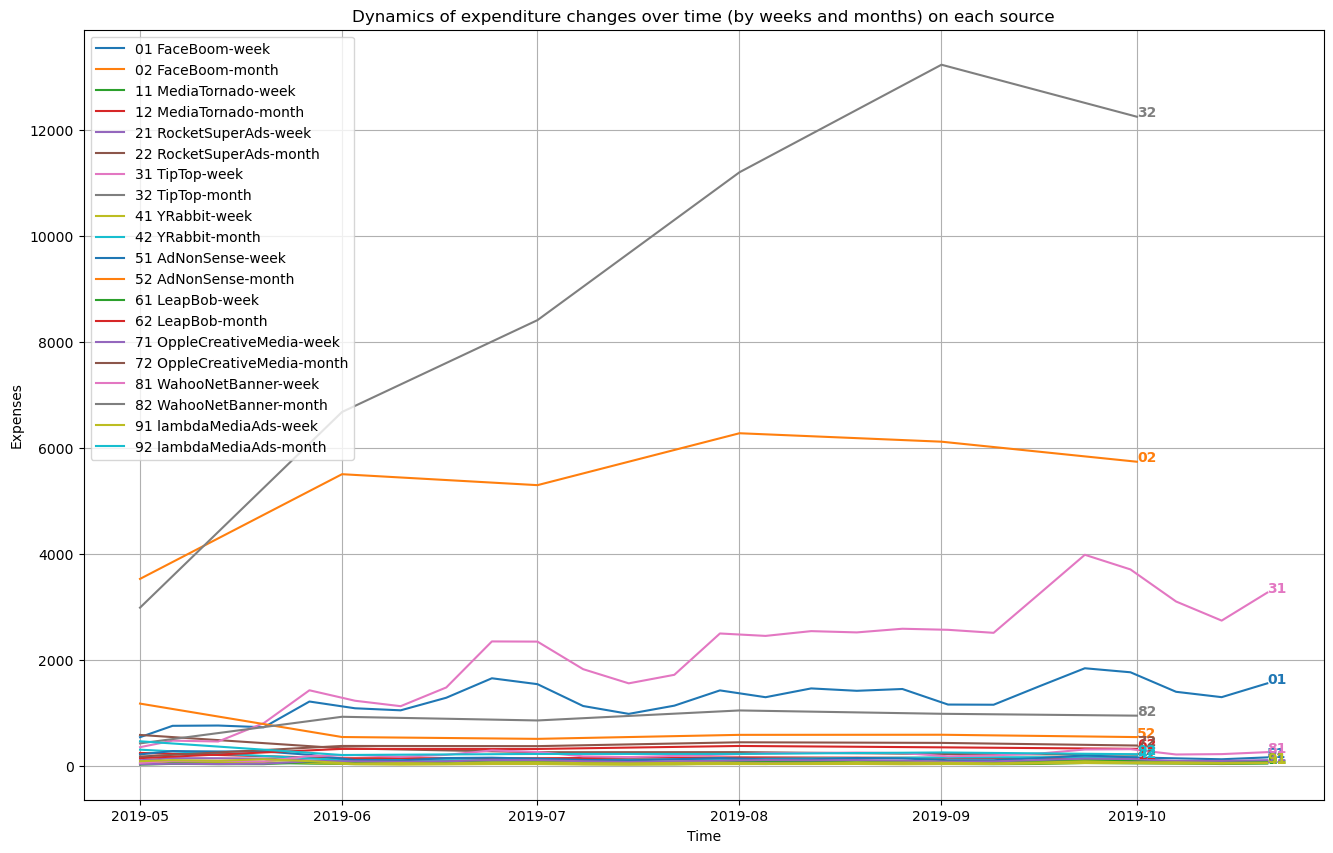

In [32]:
# in the loop, iterate over unique channels from the costs.channel column, we use numerator
# to add captions to lines in the legend, because there are quite a lot of lines
# (it is possible to bring all data into one table, but NaN will appear, and rendering will have breaks)

plt.figure(figsize=(16,10)) # graph's size

for i in enumerate(costs.channel.unique()): # here i[0] - serial numbers, i[1] - unique channel names
    c = a[a['channel']==i[1]] # dataframe a we've just formed, from it now taking data by channels
    wk = c.groupby(['week']).agg({'costs':'sum','dt':'first'}).set_index('dt')[['costs']]  # costs-weeks
    mn = c.groupby(['month']).agg({'costs':'sum','dt':'first'}).set_index('dt')[['costs']] # costs-months

    wk_gr = plt.plot(wk, label=str(i[0])+'1 '+i[1]+'-week') # give different labels using the numerator
    color = wk_gr[0].get_color() # under the name wk_gr we have a line, its color code is stored in it at index 0
    plt.text(x=wk.index[-1],y=wk.loc[wk.index[-1],'costs'],s=str(i[0])+'1',c=color,weight='bold') # numerator to line end
    
    mn_gr = plt.plot(mn, label=str(i[0])+'2 '+i[1]+'-month') # same, for months
    color = mn_gr[0].get_color()
    plt.text(x=mn.index[-1],y=mn.loc[mn.index[-1],'costs'],s=str(i[0])+'2',c=color,weight='bold') # same, for months

plt.title('Dynamics of expenditure changes over time (by weeks and months) on each source')
plt.xlabel('Time') # axis labels and graph name
plt.ylabel('Expenses')
plt.legend() # line signatures on graph (legend)
plt.grid() # grid
plt.show()

__*Output according to the schedule of the dynamics of changes in expenses over time (by weeks and months) for each source:*__ spending on TipTop and AdNonSense channels is the highest, and in the reporting period they generally grew.

#### Find out how much it cost on average to get one user (CAC) from each source (use user profiles).

In [33]:
# to solve this problem, we aggregate data from complete profiles built earlier,
# and then apply the arithmetic mean and median functions  
   
a = (profiles_full.groupby(['channel'])
     .agg({'acquisition_cost':['mean','median']})
     .reset_index()
    )
a.columns = ['channel', 'mean', 'median'] # rename columns
print('CAC expenses by channels, as well as average across the entire database')
a = a.sort_values(by='mean', ascending=False) # output the arithmetic mean in descending order

a.loc[len(a)]=['---all_in_all---',            # add total mean and median to the end of list
profiles_full['acquisition_cost'].mean(),
profiles_full['acquisition_cost'].median()]
a

CAC expenses by channels, as well as average across the entire database


channel      mean    median
6               TipTop  2.799003  3.000000
1             FaceBoom  1.113286  1.114667
0           AdNonSense  1.008054  1.004348
9       lambdaMediaAds  0.724802  0.733333
7       WahooNetBanner  0.602245  0.600000
5       RocketSuperAds  0.412095  0.404444
4   OppleCreativeMedia  0.250000  0.250000
8              YRabbit  0.218975  0.214286
3         MediaTornado  0.218717  0.220926
2              LeapBob  0.210172  0.210000
10             organic  0.000000  0.000000
11    ---all_in_all---  0.703278  0.247500

__Conclusions on the marketing section:__ 
- Marketing expenses for the reporting period amounted to $105497
- On the 1st place are Tip Top expenses: 52% of expenses for 13.04% of paying customers (clear disparity)
- On the 2nd place are Facebook expenses: 31% of expenses for 19.43% of paying customers (the disparity can be partially justified by customers from the organic channel)
- On the 3rd place are WahooNetBanner expenses: 5% of expenses for 5.70% of paying customers
- Charts of distribution of advertising costs by channels in the context of months and weeks show that in the current period, most of the costs were made on the WahooNetBanner (81.82) and AdNonSense (51.52) channels with some increase by the end of the period
- According to the CAC parameter averaged over the entire period, the most expensive sources of attracting users are TipTop (2.8), FaceBoom (1.11) and AdNonSense (1.0).

### Evaluate the payback of advertising.

Using LTV, ROI and CAC charts, analyze the payback of advertising. Consider that November 1, 2019 is on the calendar, and the business plan stipulates that users should pay off no later than two weeks after the attraction. Determine if there is a need to include organic users in the analysis.

We will:
- Analyze the payback of advertising using graphs of LTV and ROI, as well as graphs of the dynamics of LTV, CAC and ROI.
- Check the user conversion rate and the dynamics of its change. Do the same with user retention. Build and study conversion and retention charts.
- Analyze the payback of advertising by device. Plot LTV and ROI graphs, as well as LTV, CAC, and ROI dynamics graphs.
- Analyze the payback of advertising by country. Plot LTV and ROI graphs, as well as LTV, CAC, and ROI dynamics graphs.
- Analyze the payback of advertising by advertising channels. Plot LTV and ROI graphs, as well as LTV, CAC, and ROI dynamics graphs.

- Extra questions:
    - Does advertising aimed at attracting users in general pay off?
    - Which devices, countries and advertising channels can have a negative impact on the payback of advertising?
    - What can cause payback problems?

#### Check the user conversion rate and its dynamics. The same with user retention. Build and study conversion and retention graphs.

__Remark:__ for higher accuracy, the "organic" channel will be removed from profiles_full in this section, i.e. from now on, by default, we will analyze only those users who clicked a paid banner of an advertising provider.

In [34]:
profiles = profiles_full.query('channel != "organic"')  # filter organic
1 - len(profiles) / len(profiles_full)  # count, how much the table compressed

0.3762399338701936

Apparently, the table has decreased by 37.62% (see 0-row in cell[21] *[jump to code cell 21](#cell21))

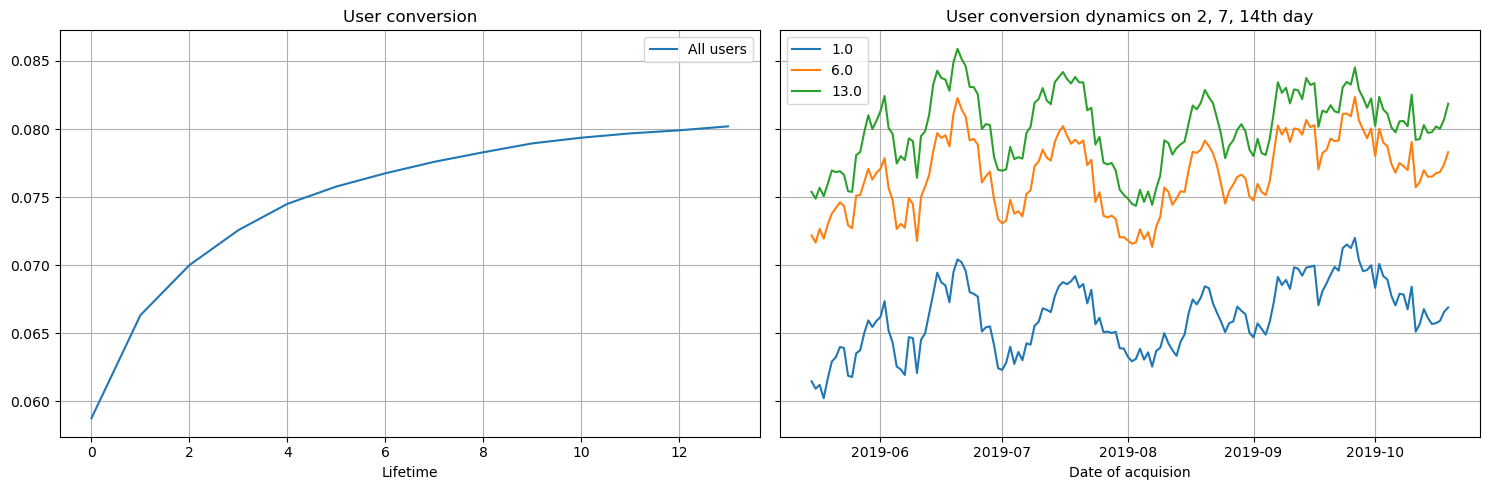

In [35]:
# calculate CR conversion, display dynamics on the 2nd, 7th and 14th days, for this function code is slightly changed

conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, datetime(2019, 11, 1).date(), 14)

plot_conversion(conversion, conversion_history, horizon=[2,7,14], window=15) # some horizons for 2nd graph

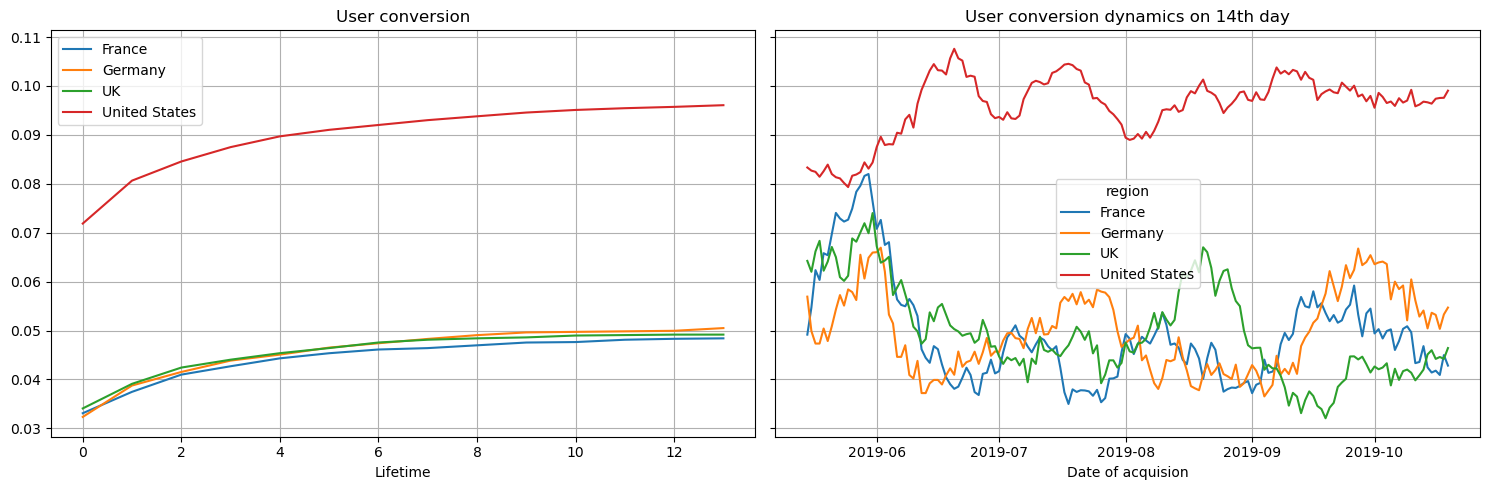

In [36]:
# now leave only the horizon of 14 days and group by country

conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, datetime(2019, 11, 1).date(),
                                                                horizon_days=14, dimensions=['region'])

plot_conversion(conversion, conversion_history, horizon=[14], window=15)   # printing out

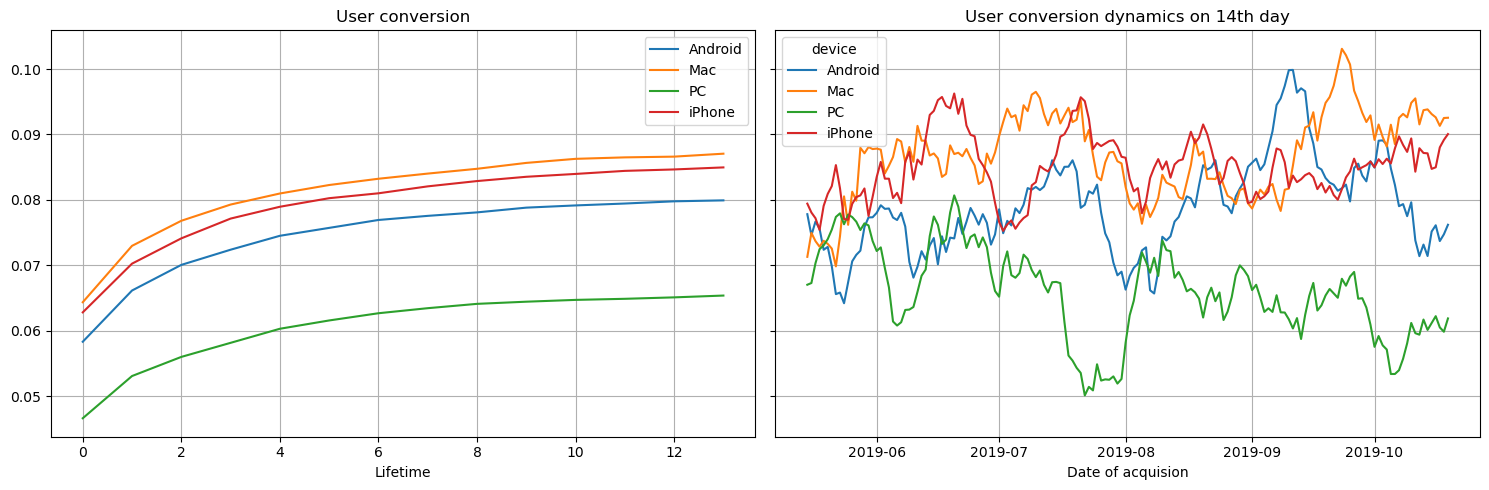

In [37]:
# leave only horizon of 14 days and group by devices

conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, datetime(2019, 11, 1).date(),
                                                                horizon_days=14, dimensions=['device'])

plot_conversion(conversion, conversion_history, horizon=[14], window=15)   # print out

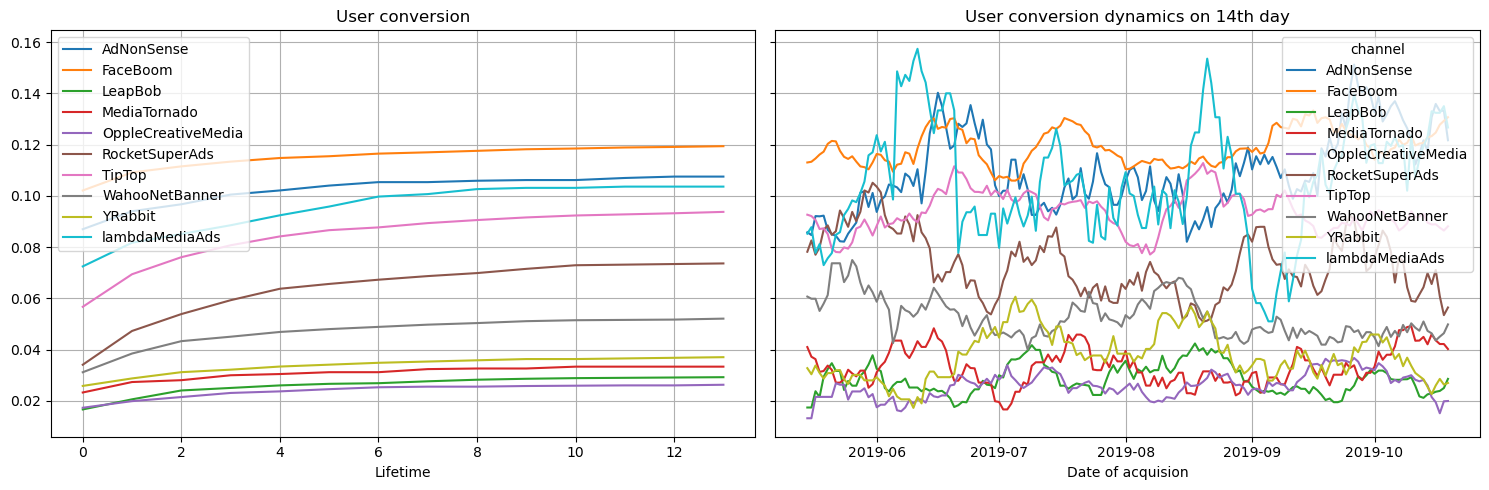

In [38]:
# leave only horizon of 14 days and group by channels

conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, datetime(2019, 11, 1).date(),
                                                                horizon_days=14, dimensions=['channel'])

plot_conversion(conversion, conversion_history, horizon=[14], window=15)   # print out

__*Conclusions on conversion charts:*__ 

- with the increase in lifetime, the total conversion rate for users who came through paid banners tends to 0.81, the conversion dynamics shows that it was lower at the beginning of the period and is slowly growing, obvious fluctuations with a period of about 1 month are visible on the graph. The conversion rate of American users is ~2 times higher than that of European users (England, Germany, France), the dynamics of conversion of European users shows a slight decrease, while that of American users is growing. By device, the conversion rate on PC is lower, and the dynamics shows its decline over time. When divided into the top three channels Facebook, Ad Non Sense and lambda Media Ads, lambda Media Ads have large fluctuations on the history chart, which probably requires additional study.

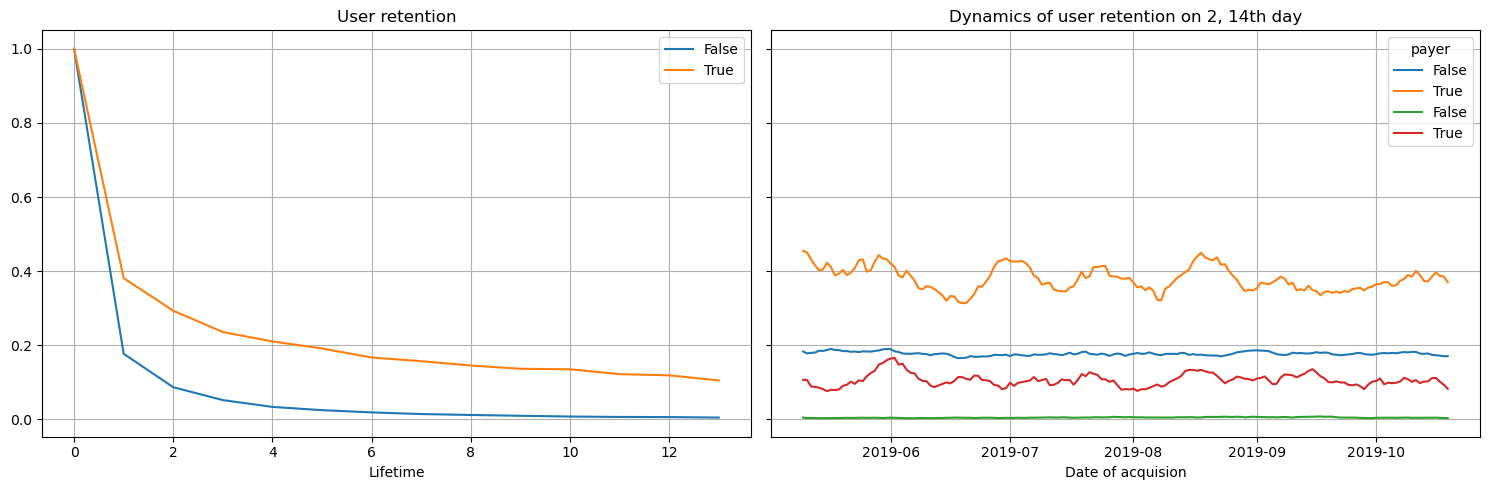

In [39]:
# calculate RR retention coefficient, display days 2 and 14 (payers + non-payers) on the retention dynamics graph

retention_raw, retention, retention_history = get_retention(
    profiles, sessions, datetime(2019, 11, 1).date(), 14, dimensions=[]
)
plot_retention(retention, retention_history, horizon=[2,14], window=10)

To plot retention graphs with grouping by 3 features, let's turn to the new function. Instead of graphs of dynamics on the right, we will output (for comparison) similar graphs of retention of users of the "organic" channel. The share of "organic" users is a significant 37.62%, so it is also useful to analyze them, although this is not directly part of the task of the study.

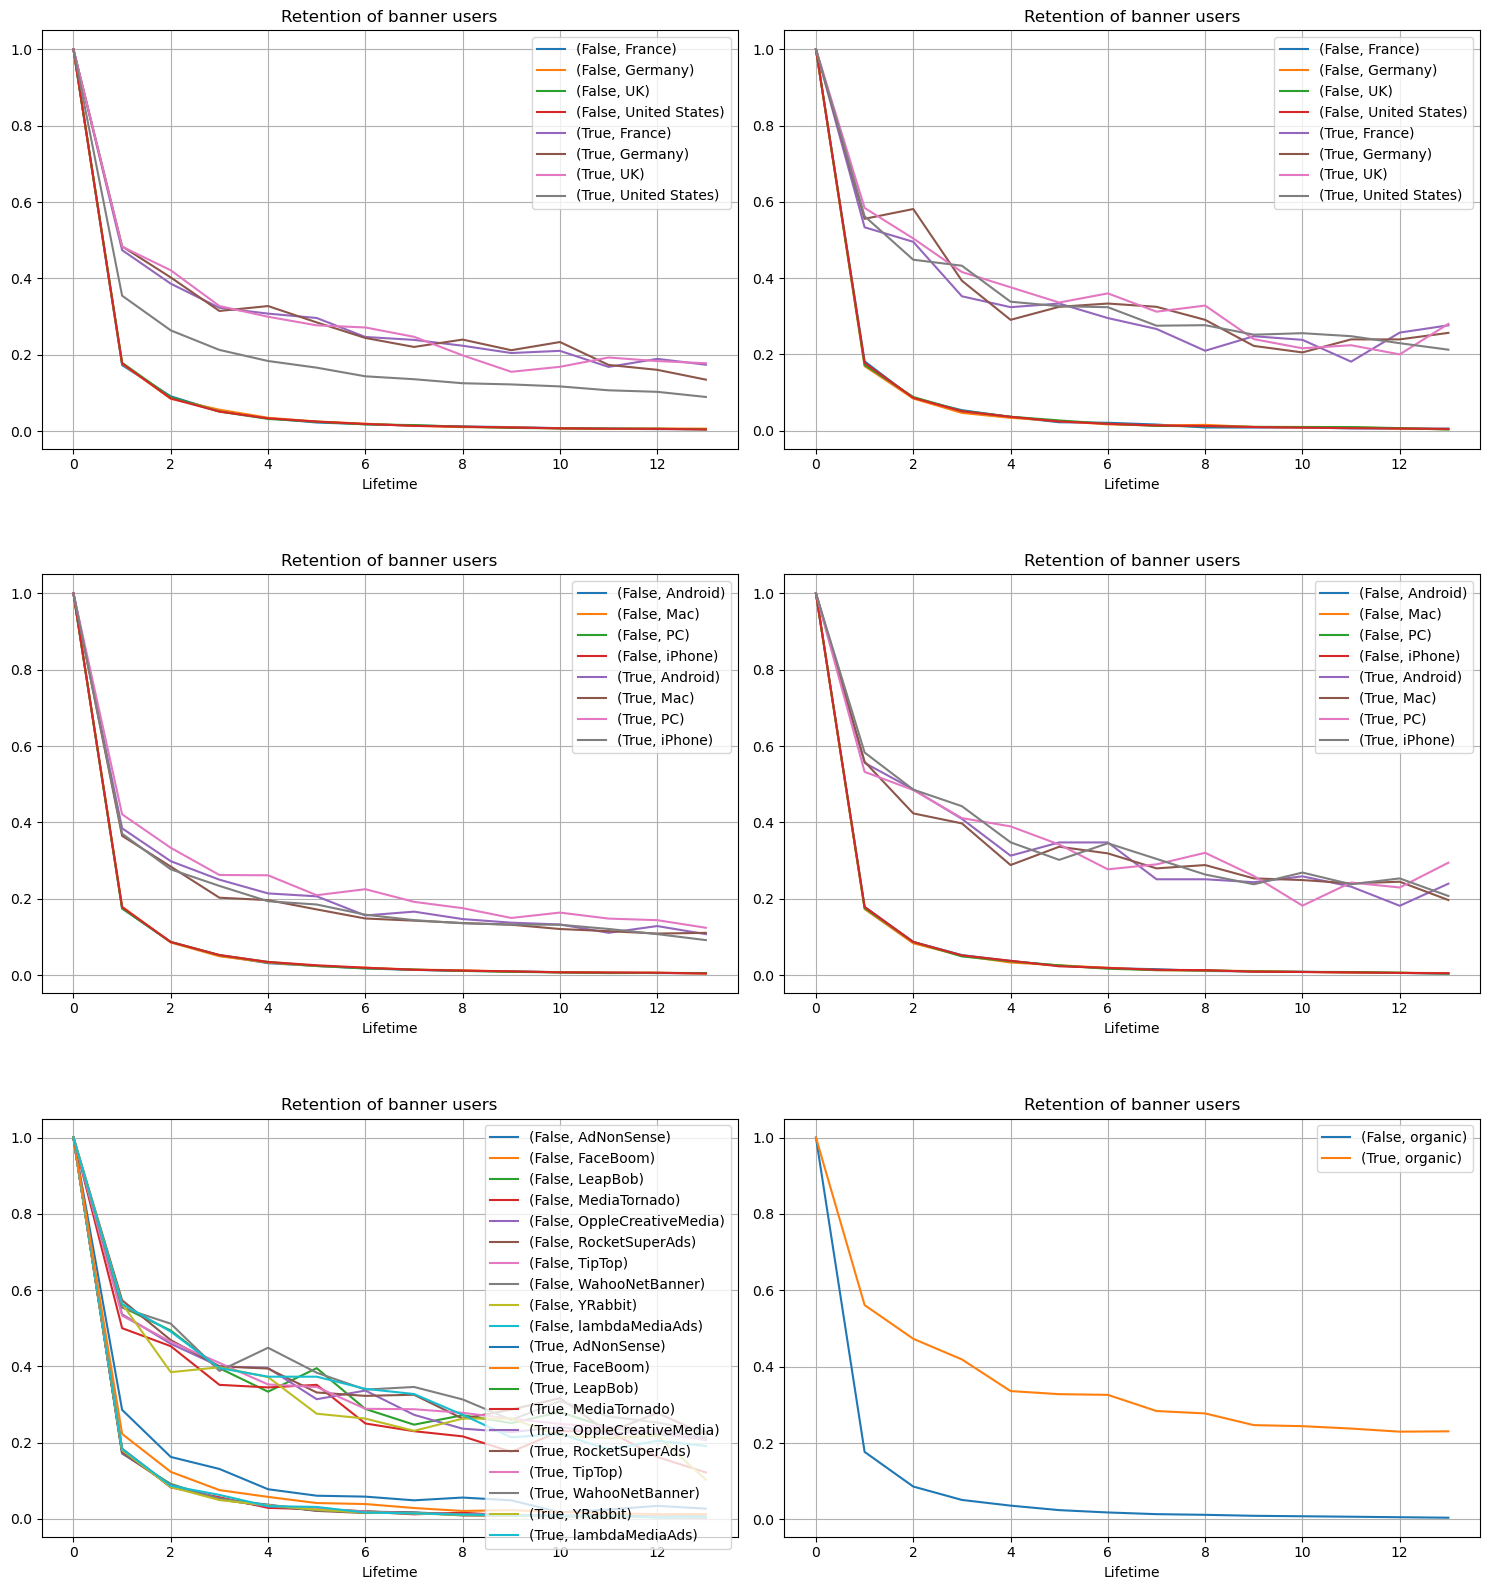

In [40]:
# passing the full user profiles, date, horizon and canvas size to the function

plot_retention_3(profiles_full, sessions, datetime(2019, 11, 1).date(), horizon=14, size=(15, 16))

__*Conclusions on retention graphs:*__ 
- the graph has a kink, because a large number of users disappear on the 2nd day, over time this trend does not change either depending on whether the user pays or on the date of observations. Retention of European paying users is higher than paying American users, while paying "organics" are held better than banner users – this is true for all 3 groupings (by region, device and banner providers).

#### Analyze payback of advertising using DEM and ROI graphs, as well as dynamics graphs LTV, CAC & ROI.

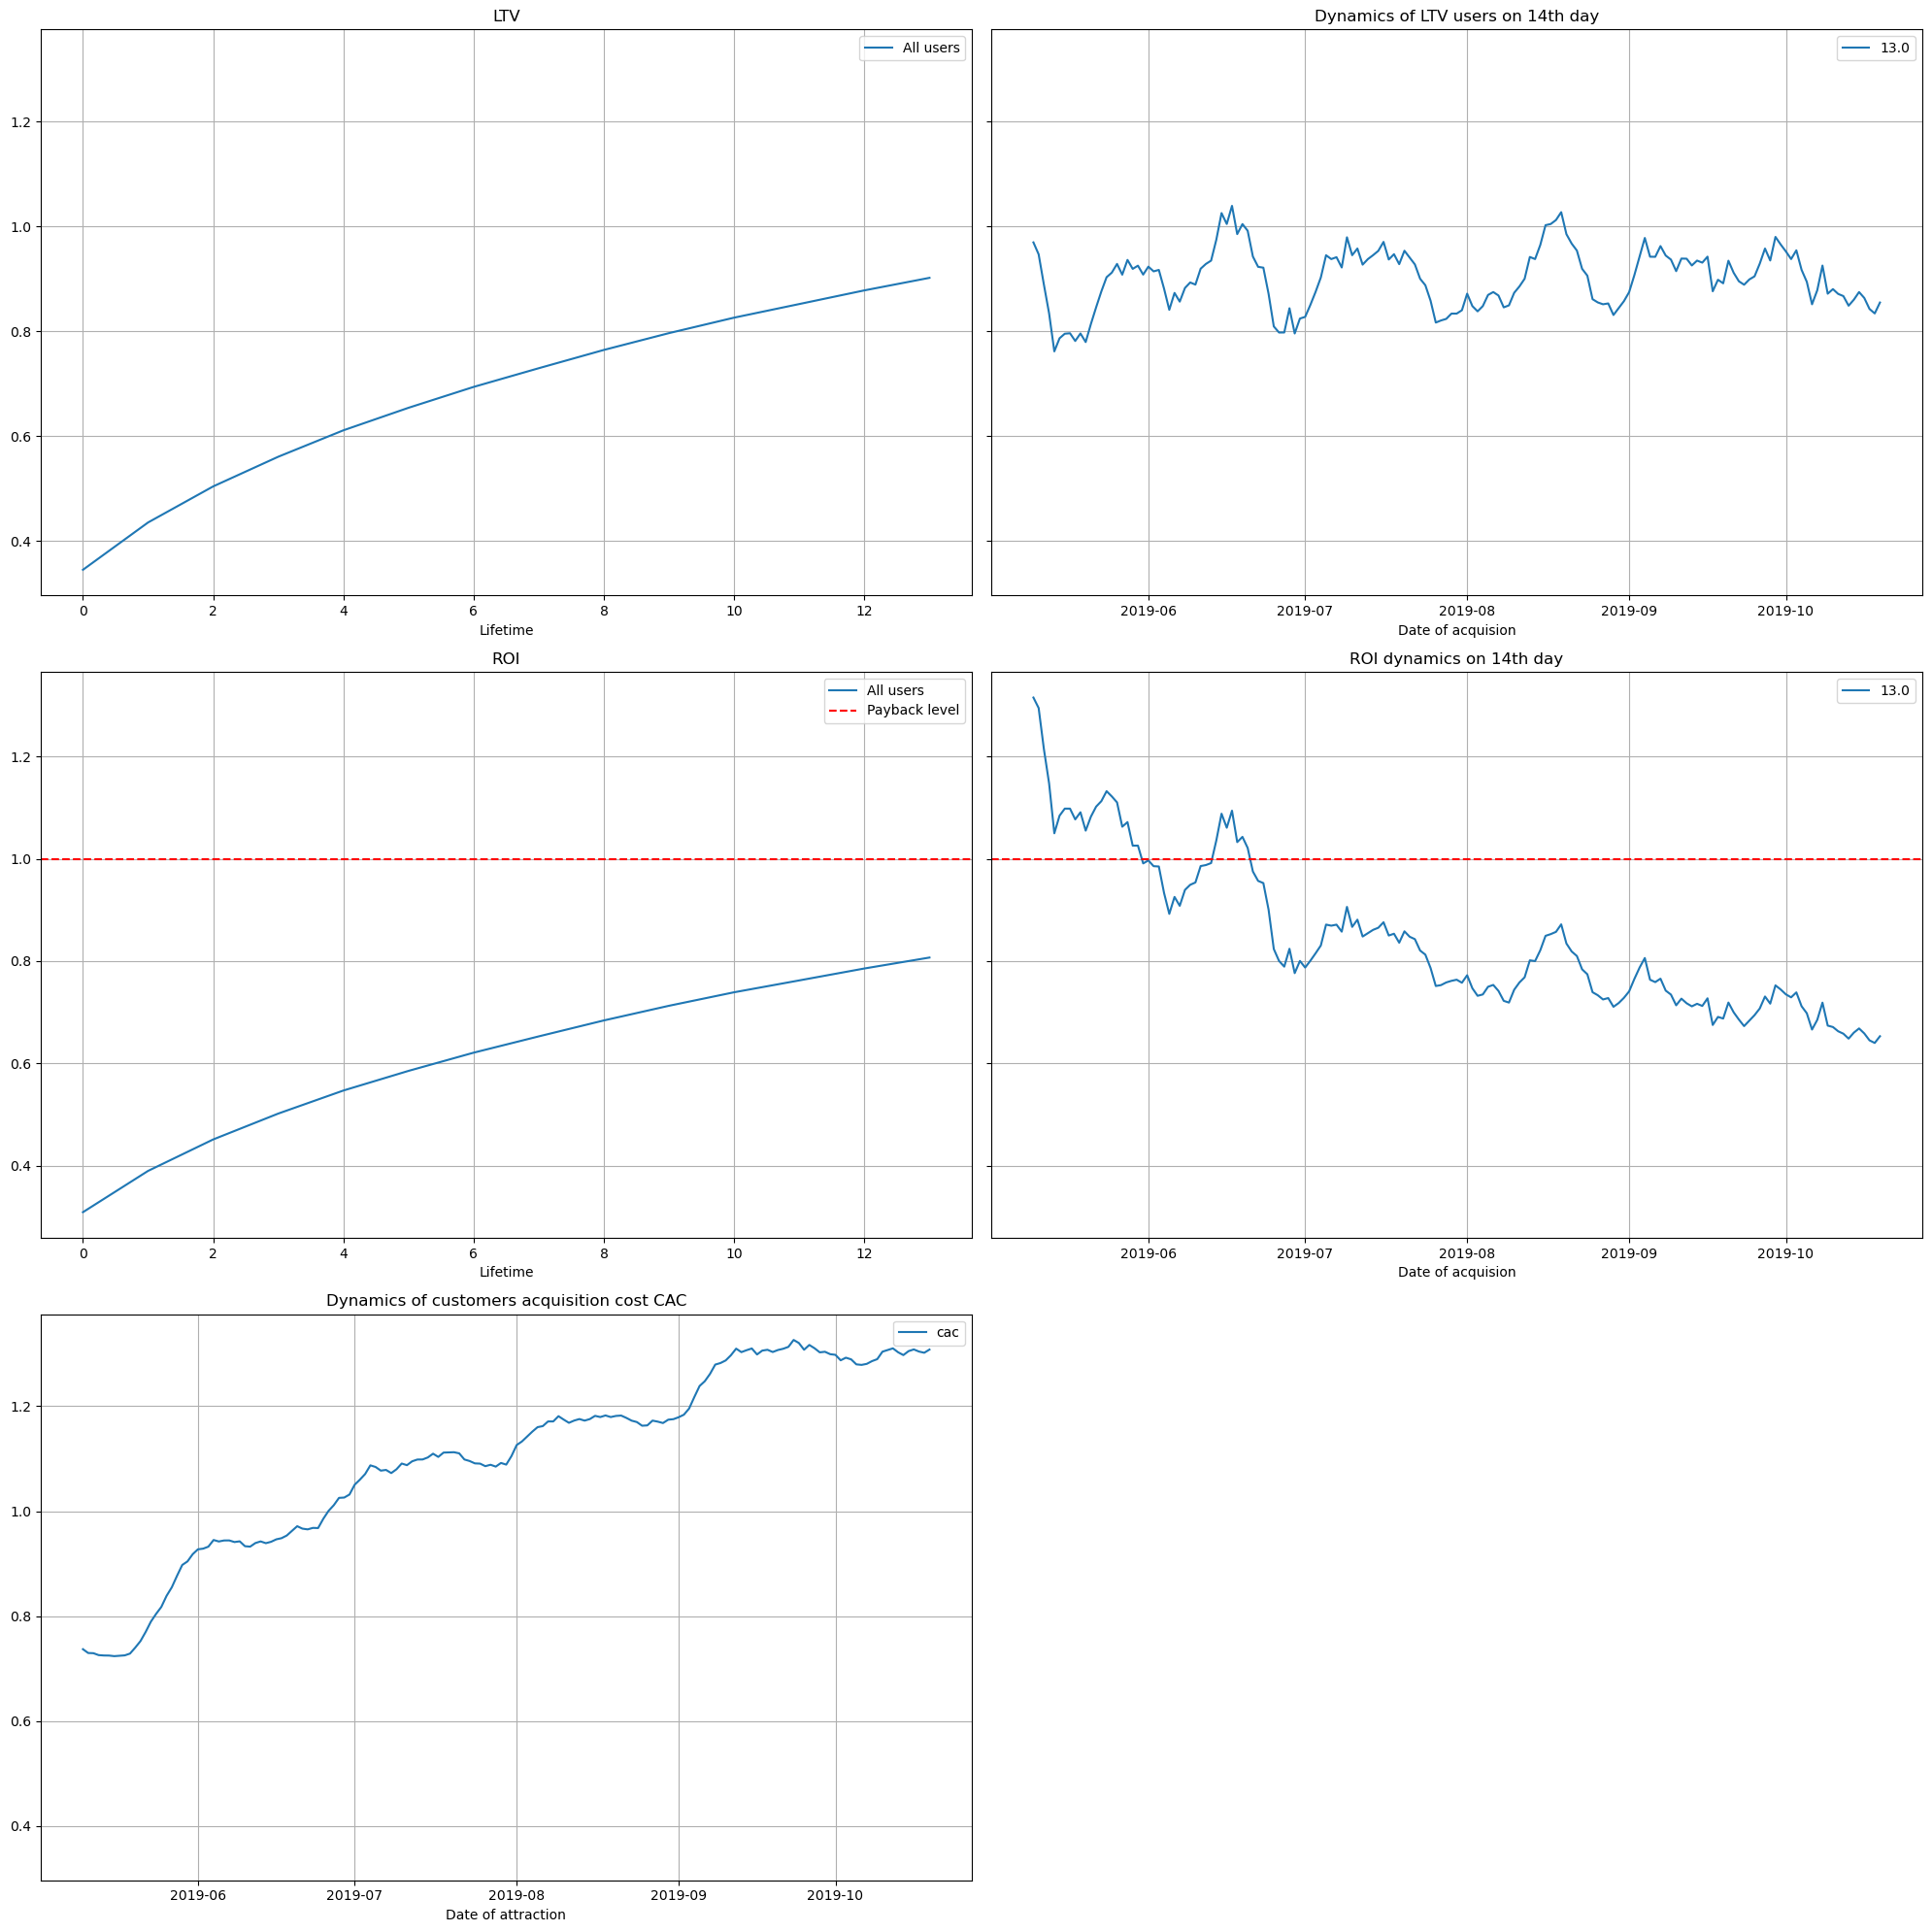

In [41]:
# count LTV, CAC and ROI on the 14th day for all users

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
     profiles,
     orders,
     datetime(2019, 11, 1).date(),
     14,
     dimensions=[]
)

# graphs: standard function was rebuilt for 2 columns, order of their output was changed
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon=14, window=10)

__*Conclusions on analytics without allocation of groups:*__ 
- LTV has not stabilized even on 14th day and is growing, the history chart shows fluctuations in its level with a period of about 1 month or less. ROI of 14th day for users who came from paid banners is ~0.8 and there seems to be every chance to step over the payback level in the future, however, on closer examination (ROI dynamics graph) it can be seen that since the summer the ROI has not reached 1 and even worse - it is falling, and falling throughout the entire observation period. CAC is constantly growing, and this is alarming.

#### Analyze payback of advertising by device. Plot LTV and ROI graphs, as well as dynamics graphs LTV, CAC & ROI.

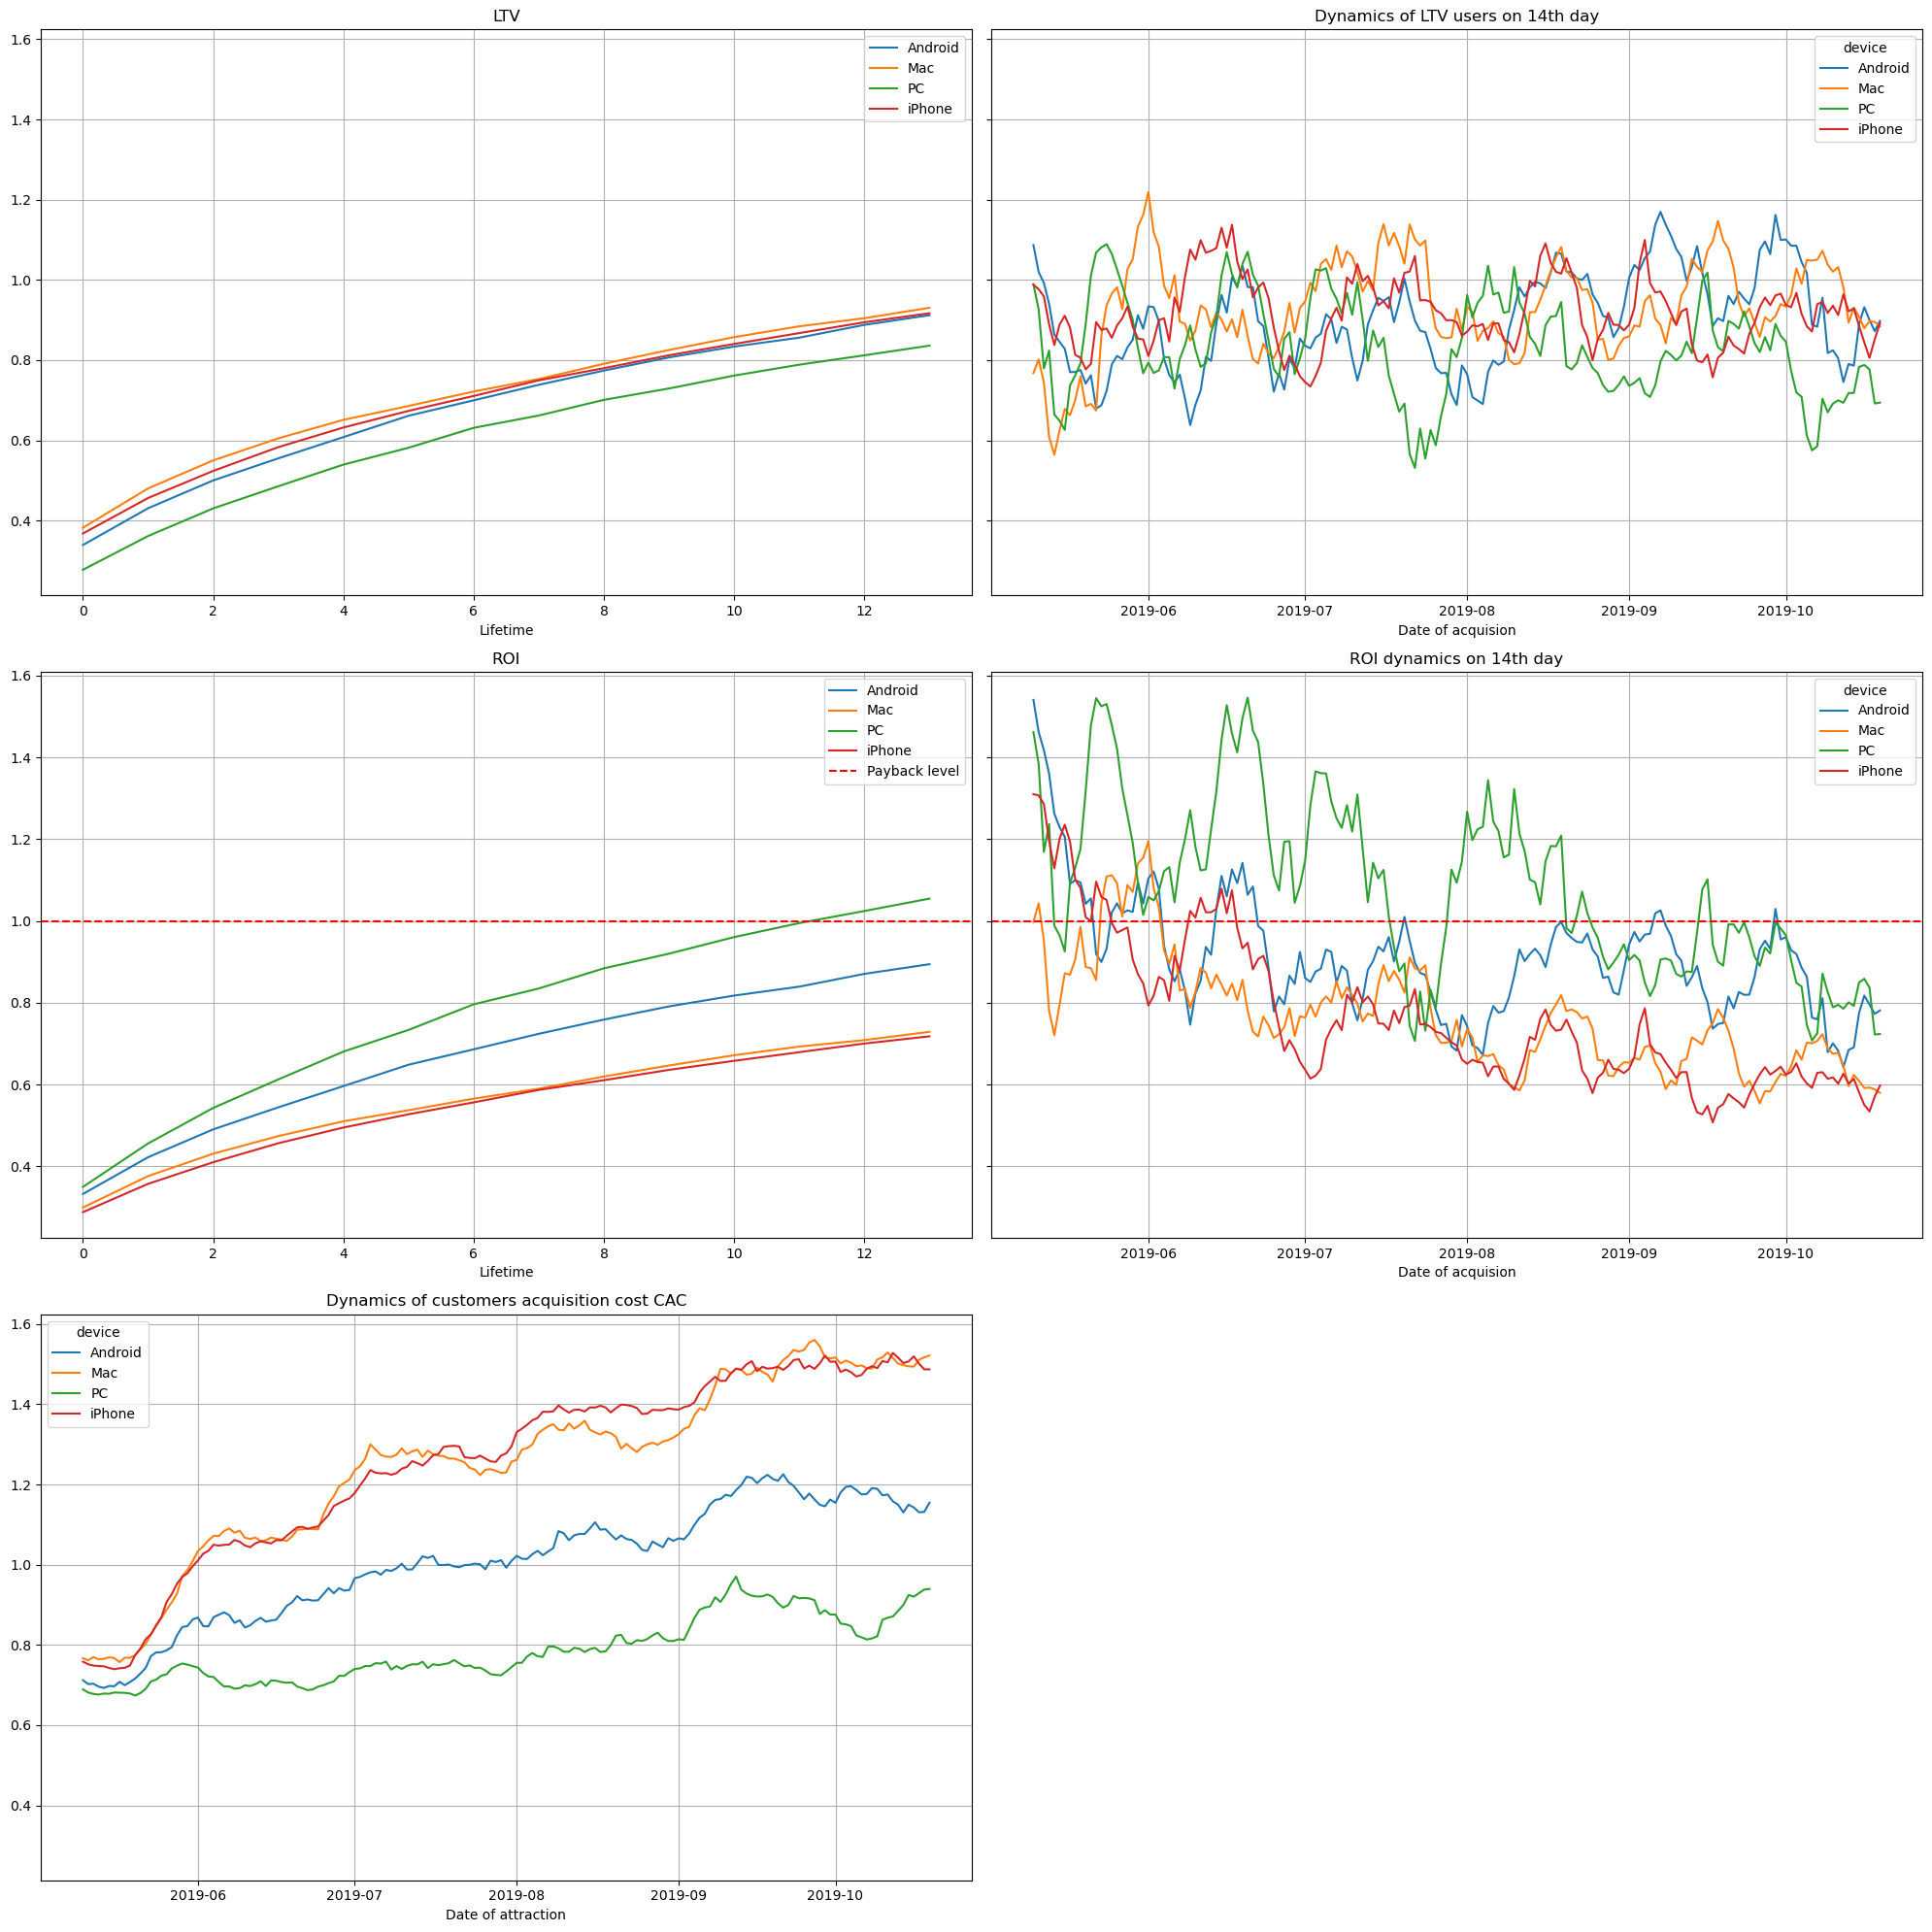

In [42]:
# count LTV, CAC, and ROI grouped by devices that users log in from

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
     profiles,
     orders,
     datetime(2019, 11, 1).date(),
     14,
     dimensions=['device']
)

# building graphs with same function as the previous time, averaging window is 10 days
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon=14, window=10)

__*Conclusions on grouped by device:*__ 
- PC LTV lags behind the rest, the periods of fluctuations of LTV dynamics for different devices are different, but periodic and similar in appearance. PC crosses ROI-one on the 11th day, Android has a chance to pay off sometime, but Mac and iPhone probably will never cross the payback line. The dynamics of ROI shows that since autumn even the PC has "dived under one", i.e. the situation is negative and is getting worse. CAC for Mac and iPhone (ironically, their lines are red and yellow on the graph) is both high and growing faster than for iPhone and PC, although for these 2 platforms the cost of acquiring banner users is also growing.

#### Analyze payback of advertising by country. Plot LTV and ROI graphs, as well as dynamics graphs LTV, CAC & ROI.

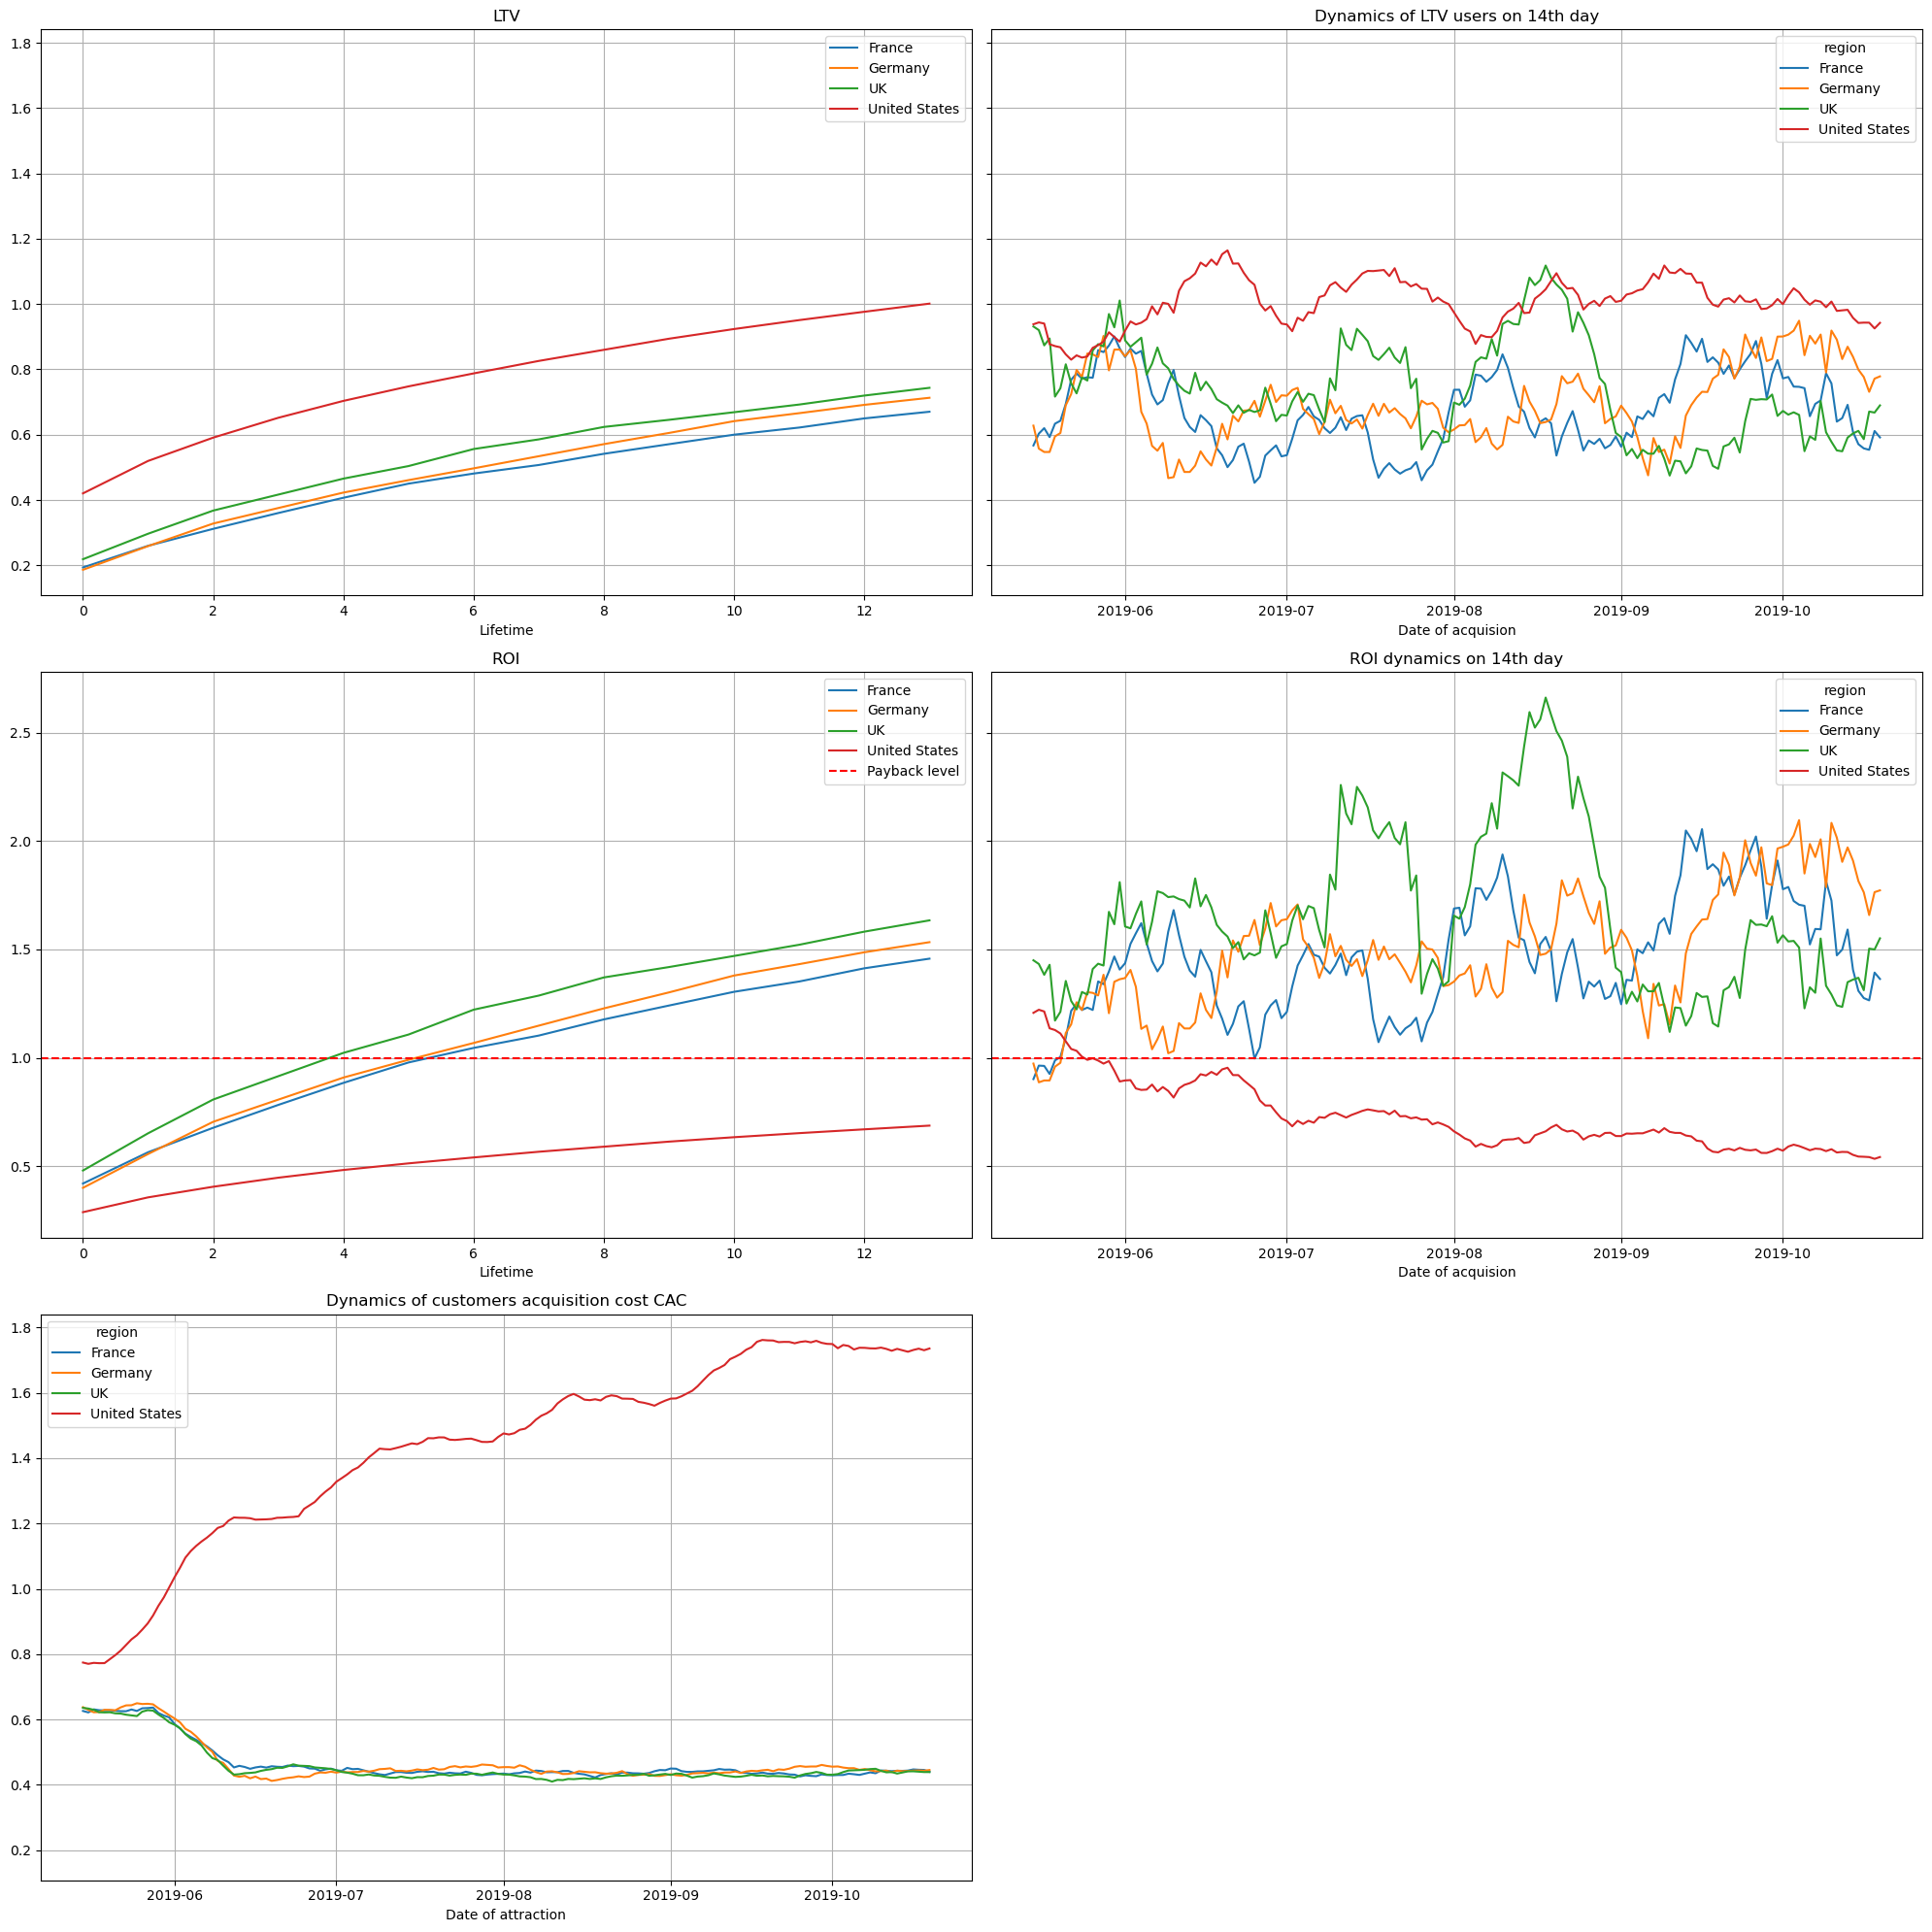

In [43]:
# calculate LTV, CAC and ROI by country (region)

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
     profiles,
     orders,
     datetime(2019, 11, 1).date(),
     14,
     dimensions=['region']
)

# building graphs with increased averaging window to 15 days
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon=14, window=15)

__*Conclusions grouped by country:*__ 
- LTV in the USA is noticeably higher, for France this parameter is worse than the rest. Dynamic LTV fluctuations with a period of ~ 1 month occur in all countries, but slightly differently, the reasons for this periodicity would be good to establish and explain. ROI for countries other than the USA does not cause concerns (by the 6th day everything is in black), but for the USA things are bad with payback – the level is unlikely to be crossed even at 0.8. The dynamics of ROI explains that problems in the USA began in June and by the end of the study period continue to increase. The CAC for European countries is rather stable, and the American CAC has gone into a 4-fold gap.

#### Analyze payback of advertising by advertising channels. Plot LTV and ROI graphs, as well as dynamics graphs LTV, CAC & ROI.

In [44]:
# list of channels for easy reading of graphs is below. To zoom graphics in the browser, press Ctrl+

list(sessions['channel'].unique()) 

['organic',
 'TipTop',
 'RocketSuperAds',
 'YRabbit',
 'FaceBoom',
 'MediaTornado',
 'AdNonSense',
 'LeapBob',
 'WahooNetBanner',
 'OppleCreativeMedia',
 'lambdaMediaAds']

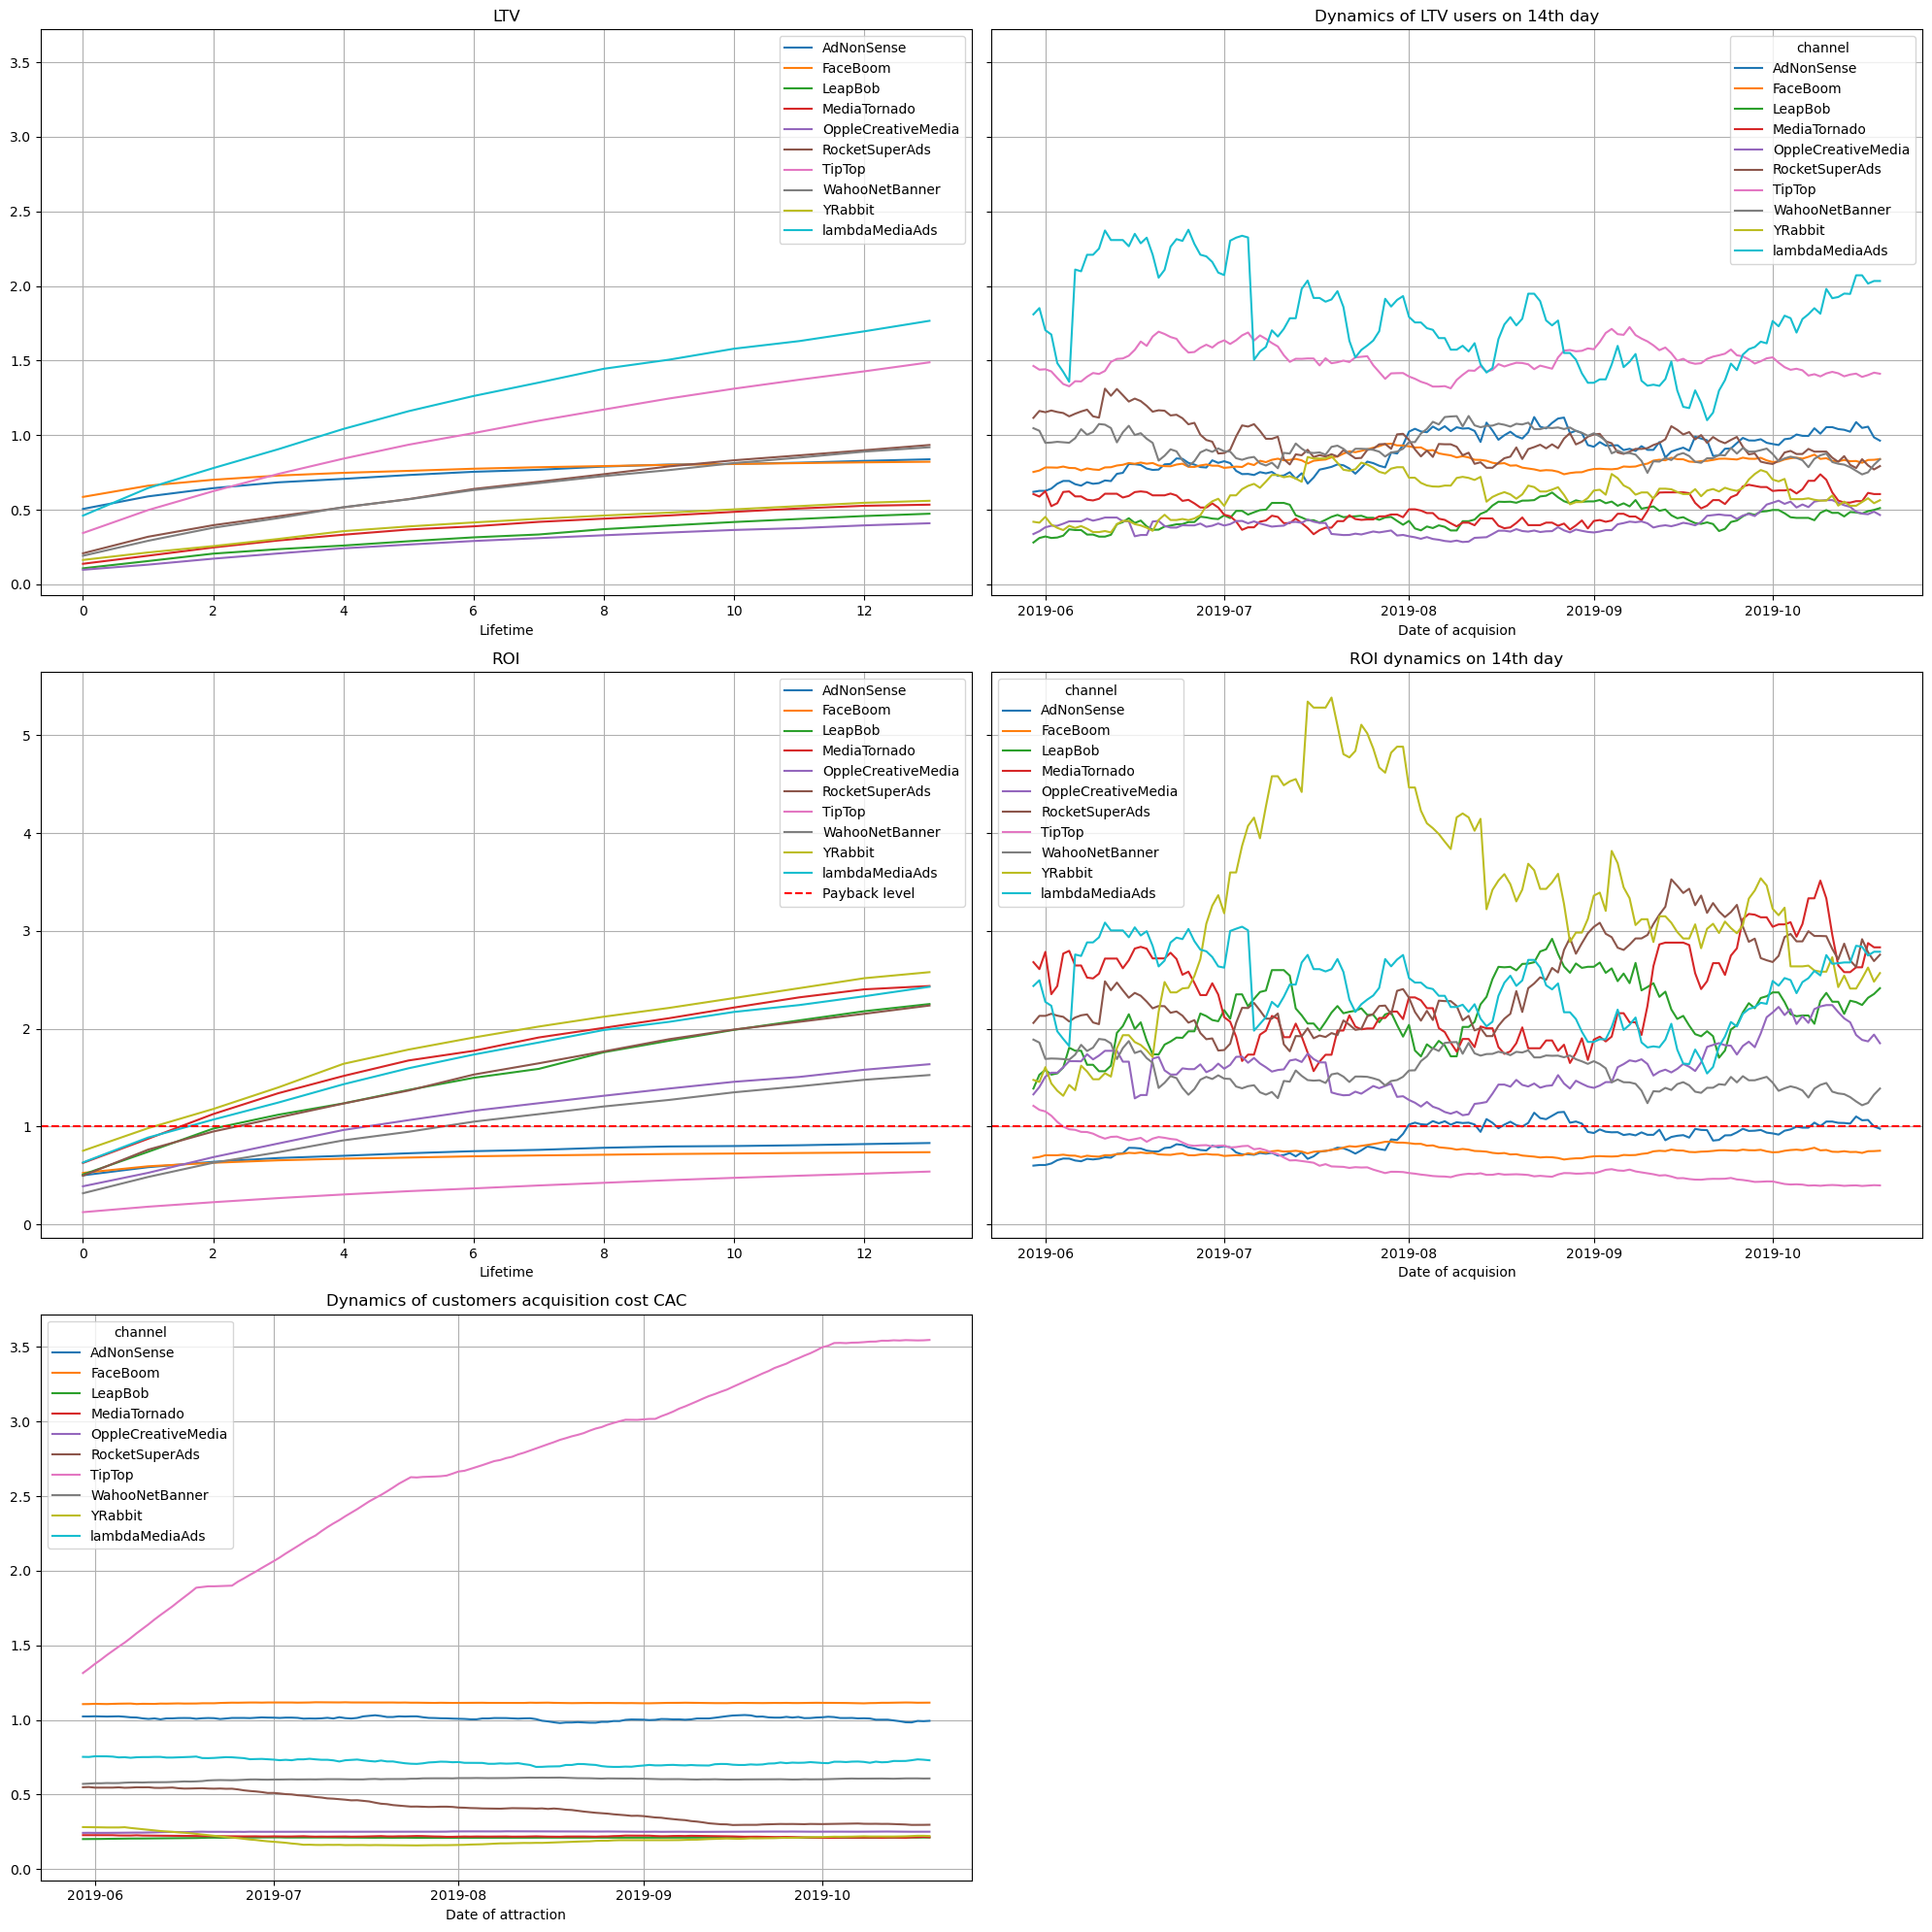

In [45]:
# count LTV, CAC and ROI broken down by user engagement channels

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
     profiles,
     orders,
     datetime(2019, 11, 1).date(),
     14,
     dimensions=['channel']
)

# building graphs, set the averaging window at the level of 30
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon=14, window=30)

__*Conclusions on grouped by channels:*__ 
- LTV lambda Media Ads and TipTop are noticeably higher than the others, in September LTV lambda Media Ads was lower than TipTop, but by the end of the period it had straightened out. TipTop's ROI is noticeably below 1, Facebook and AdNonSense are not doing much better. YRabbit, Media Tornado, lambda Media Ads are the best in payback. In the dynamics of RODY Rabbit, its July leadership has lost, AdNonSense has been fluctuating around 1 in recent months, Facebook is consistently bad, and things are even getting worse over time at TipTop. CAC (the cost of acquisition of one client) on all channels is approximately unchanged (RocketsSuperAds only moved to the top three cheapest in the fall), but TipTop spending is unreasonably growing and exceeds the level of other channels by at least 3.5 times.

#### Comparison of US/EU business indicators.

From the data above, we know that the number of users in the USA is 2/3, the rest are from 3 European countries. The graphs show how economic indicators have become strikingly different in the United States and European countries since the summer of 2019. Let's repeat the previous analysis by region, but this time we will gather 3 European countries into one "EU" region.

In [46]:
# create a copy of banner users' dataframe and change non-USA by EU

profiles_usaeu = profiles.copy()
profiles_usaeu.loc[profiles['region'] != 'United States', 'region'] = 'EU'
profiles_usaeu.head()

user_id            first_ts     channel   device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom      Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom   iPhone  United States   
3  22593348 2019-08-22 21:35:48  AdNonSense       PC             EU   
4  31989216 2019-10-02 00:07:44     YRabbit   iPhone  United States   
7  46006712 2019-06-30 03:46:29  AdNonSense  Android             EU   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  
7  2019-06-30 2019-06-01   True          1.008000

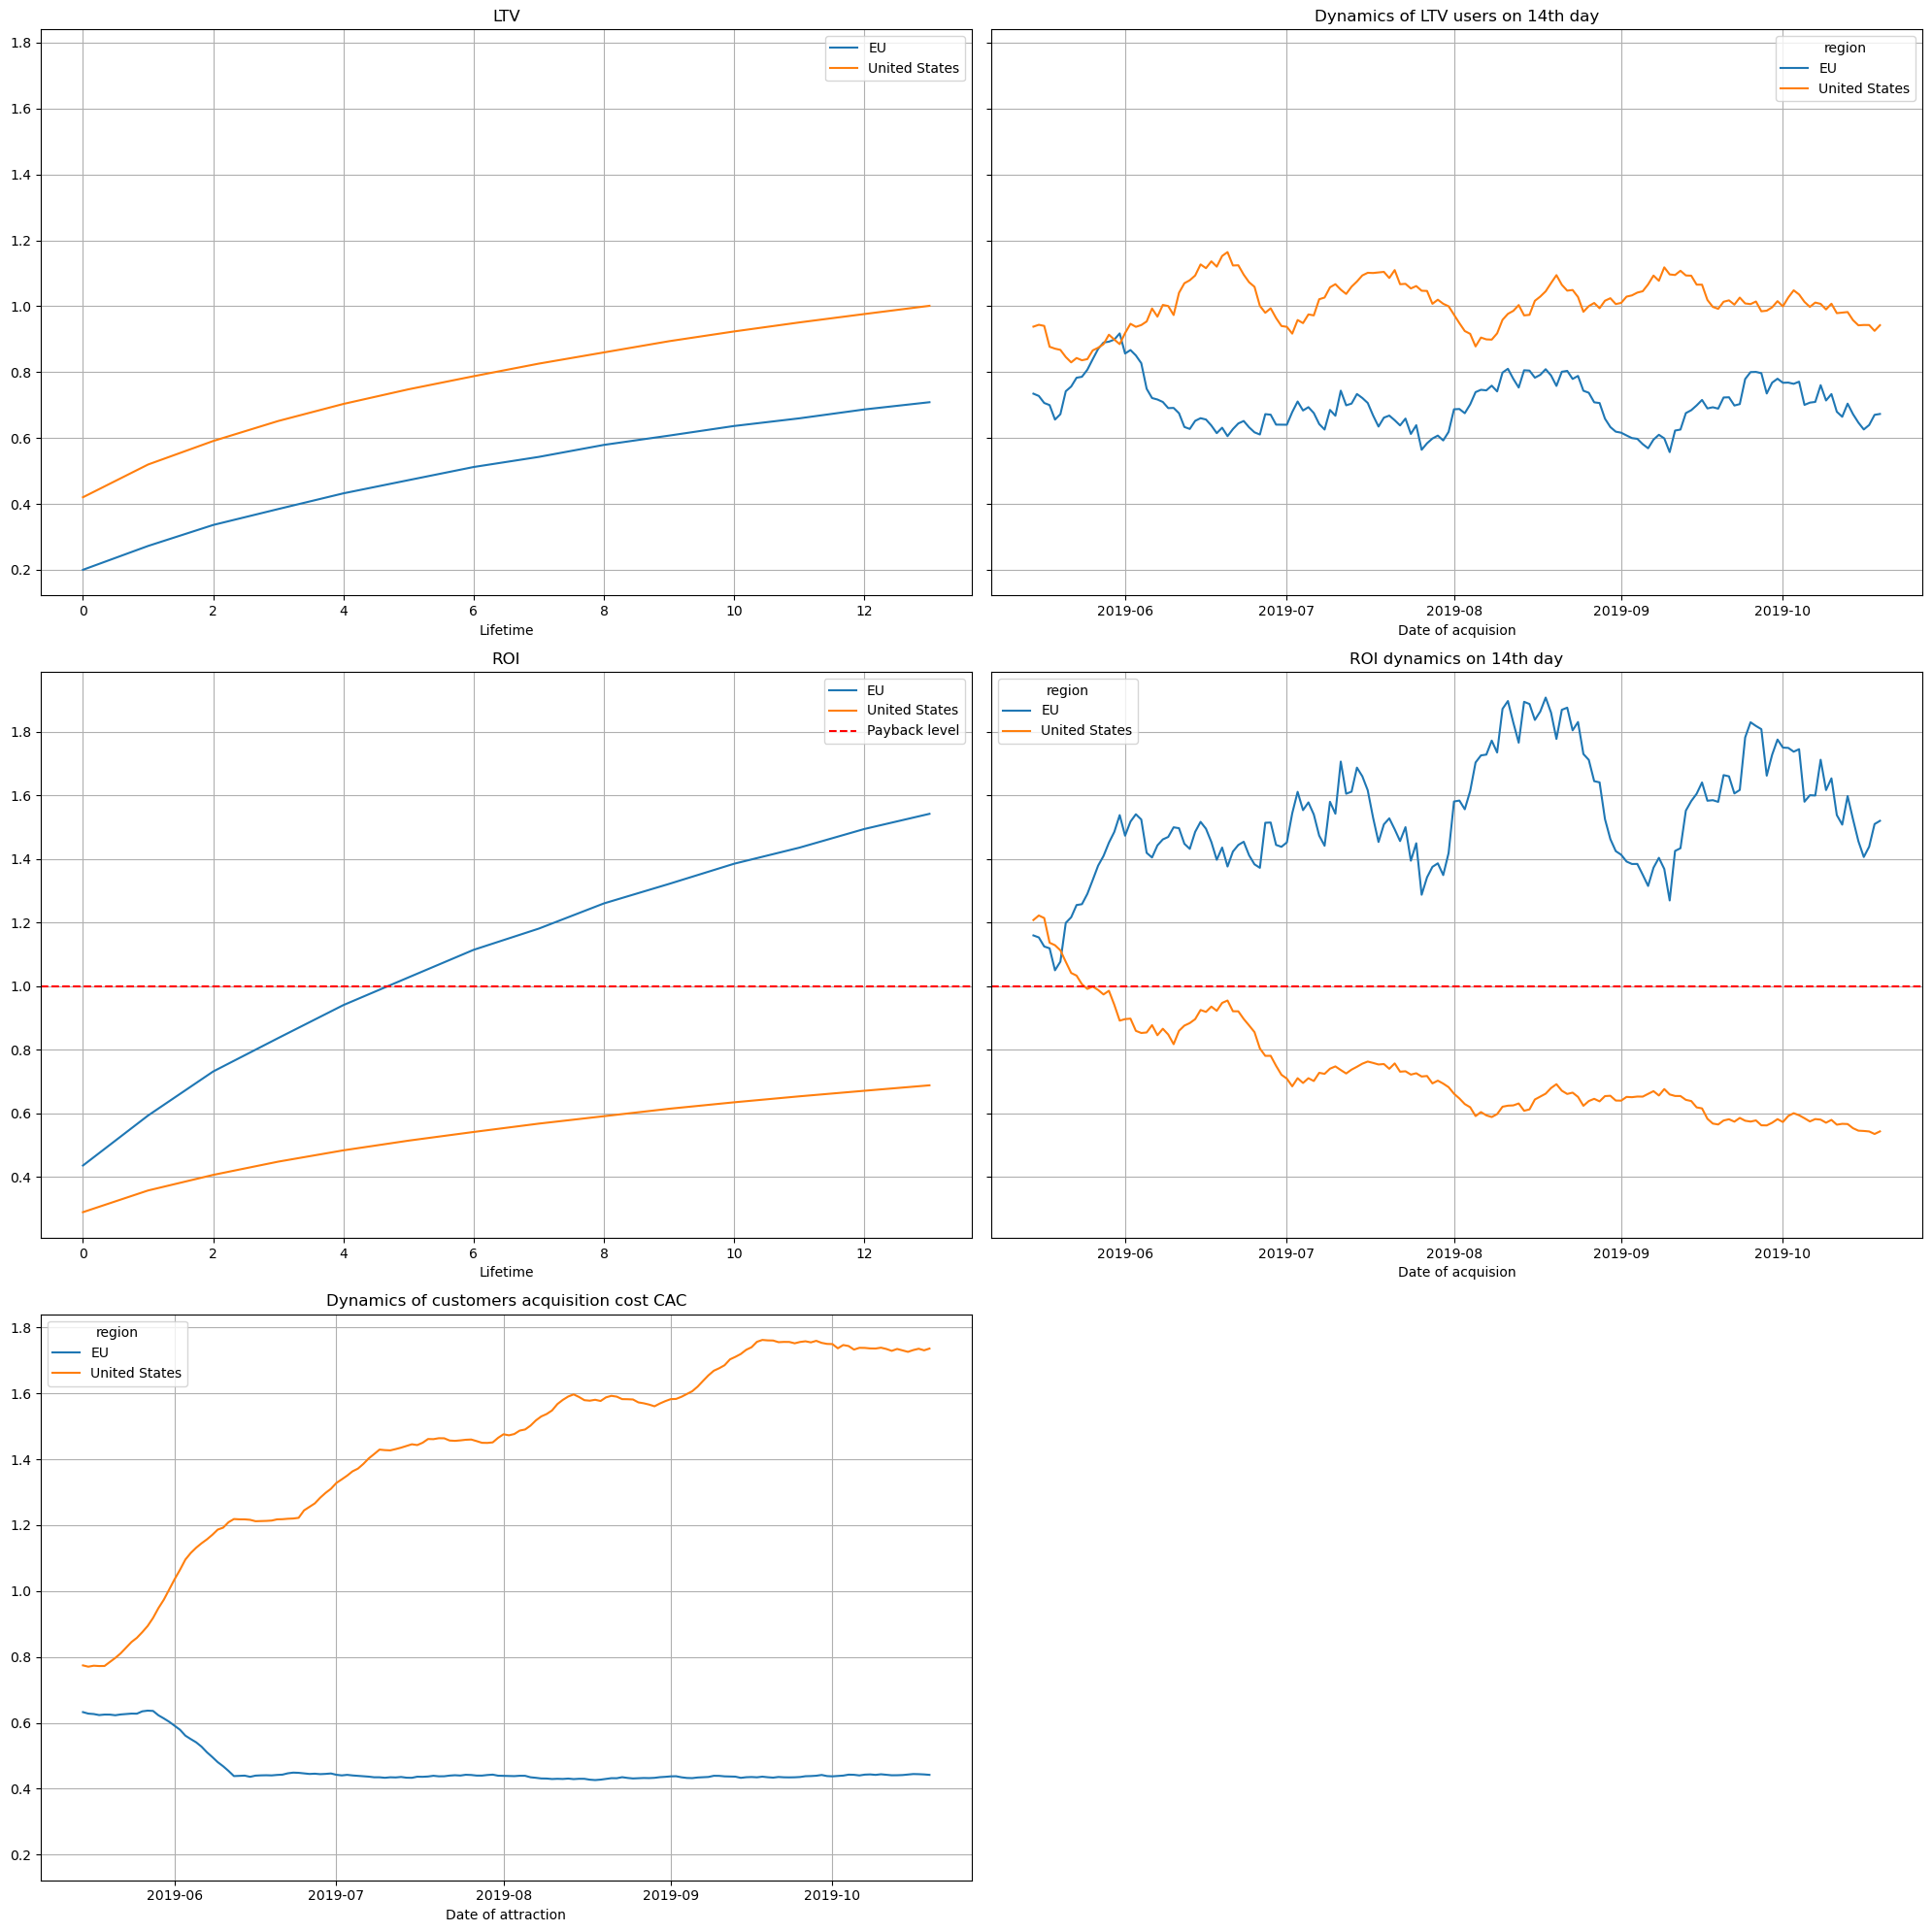

In [47]:
# count LTV, CAC and ROI by country (Europe vs. USA)

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
     profiles_usaeu,
     orders,
     datetime(2019, 11, 1).date(),
     14,
     dimensions=['region']
)

# building graphs, increased the averaging window to 15 days
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon=14, window=15)

__*Conclusions with the US/EU grouping:*__ 
- LTV in the USA is noticeably higher, dynamics of LTV for both regions is periodic, the length of the period is about 1 month. European investments pay off on the 6th day, the American ROI is ~0.7, in the dynamics of the US RAY went under one at the beginning of the summer of the 19th year and continues to decline. At the same time, at the beginning of summer, the CAC of American customers went up and in 4 months grew ~2 times, the European CAC quickly fell in price by ~ 1.5 times and after that it has been stable for several months.

### Conclusions.

Here we'll highlight the reasons for the inefficiency of attracting users, and
formulate recommendations for the marketing department.

Conclusions on user profiles (without identifying payers):
- The first session in the dataframe (2019-05-01 00:00:41) is a new client 
- New clients' sessions end on the same day as spending on advertising stops (2019-10-27), and there are no new sessions in the dataframe for the 4 remaining days
- Total new users during the study period - 150008
- Almost 38% of them come by themselves (organic channel)
- Facebook channel is on the 2nd place, it gives a stream of ~20%, on the 3rd TipTop ~13%, the 10th AdNonSense and lambda Media Ads are closing with streams of 1.5-2.5%.

Conclusions upon countries and payers:
- 2/3 of clients are in the USA
- The number of users from England, France and Germany is approximately the same (11% each) and in total gives the remaining 1/3
- The share of paying customers in the USA is also much larger and is ~7% versus ~4% for other countries
- The number of payers in the USA is about 10 times more than the number of payers in each of the other countries.


Conclusions on grouping by devices:
- ~36% of users use iPhone, Android is in 2nd place and occupies 23%, Mac and PC respectively by ~20%
- For payers, the iPhone has 6.21% (this is the 2nd place), and the Mac is in 1st place with a 6.36% payer share.

Conclusions on channels of acquisition:
- Facebook channel attracts the most paying customers (3557, which is ~12% of all users who came through this channel)
- For TipTop, the number of payers is 1878 (9.6%)
- For organic, the number of payers is 1160 (2.06%), although the total number of customers for organic is the largest.

Conclusion according to the graph of dynamics in expenses over time (by weeks and months) for each source: spending on TipTop and AdNonSense channels is the highest, and in the reporting period they generally grew.

Conclusions on the marketing section:
- Marketing expenses for the reporting period amounted to $105497
- On the 1st place are Tip Top expenses: 52% of expenses for 13.04% of paying customers (clear disparity)
- On the 2nd place are Facebook expenses: 31% of expenses for 19.43% of paying customers (the disparity can be partially justified by customers from the organic channel)
- On the 3rd place are WahooNetBanner expenses: 5% of expenses for 5.70% of paying customers
- Charts of distribution of advertising costs by channels in the context of months and weeks show that in the current period, most of the costs were made on the WahooNetBanner (81.82) and AdNonSense (51.52) channels with some increase by the end of the period
- According to the CAC parameter averaged over the entire period, the most expensive sources of attracting users are TipTop (2.8), FaceBoom (1.11) and AdNonSense (1.0).

Conclusions on conversion charts:
- with the increase in lifetime, the total conversion rate for users who came through paid banners tends to 0.81, the conversion dynamics shows that it was lower at the beginning of the period and is slowly growing, obvious fluctuations with a period of about 1 month are visible on the graph. The conversion rate of American users is ~2 times higher than that of European users (England, Germany, France), the dynamics of conversion of European users shows a slight decrease, while that of American users is growing. By device, the conversion rate on PC is lower, and the dynamics shows its decline over time. When divided into the top three channels Facebook, Ad Non Sense and lambda Media Ads, lambda Media Ads have large fluctuations on the history chart, which probably requires additional study.


Conclusions on retention graphs: 
- The graph has a kink, because a large number of users disappear on the 2nd day, over time this trend does not change either depending on whether the user pays or on the date of observations. Retention of European paying users is higher than paying American users, while paying "organics" are held better than banner users – this is true for all 3 groupings (by region, device and banner providers).


Conclusions on analytics without allocation of groups: 
- LTV has not stabilized even on 14th day and is growing, the history chart shows fluctuations in its level with a period of about 1 month or less. ROI of 14th day for users who came from paid banners is ~0.8 and there seems to be every chance to step over the payback level in the future, however, on closer examination (ROI dynamics graph) it can be seen that since the summer the ROI has not reached 1 and even worse - it is falling, and falling throughout the entire observation period. CAC is constantly growing, and this is alarming.


Conclusions on grouped by device: 
- PC LTV lags behind the rest, the periods of fluctuations of LTV dynamics for different devices are different, but periodic and similar in appearance. PC crosses ROI-one on the 11th day, Android has a chance to pay off sometime, but Mac and iPhone probably will never cross the payback line. The dynamics of ROI shows that since autumn even the PC has "dived under one", i.e. the situation is negative and is getting worse. CAC for Mac and iPhone (ironically, their lines are red and yellow on the graph) is both high and growing faster than for iPhone and PC, although for these 2 platforms the cost of acquiring banner users is also growing.

Conclusions grouped by country:
- LTV in the USA is noticeably higher, for France this parameter is worse than the rest. Dynamic LTV fluctuations with a period of ~ 1 month occur in all countries, but slightly differently, the reasons for this periodicity would be good to establish and explain. ROI for countries other than the USA does not cause concerns (by the 6th day everything is in black), but for the USA things are bad with payback – the level is unlikely to be crossed even at 0.8. The dynamics of ROI explains that problems in the USA began in June and by the end of the study period continue to increase. The CAC for European countries is rather stable, and the American CAC has gone into a 4-fold gap.


Conclusions on grouped by channels: 
- LTV lambda Media Ads and TipTop are noticeably higher than the others, in September LTV lambda Media Ads was lower than TipTop, but by the end of the period it had straightened out. TipTop's ROI is noticeably below 1, Facebook and AdNonSense are not doing much better. YRabbit, Media Tornado, lambda Media Ads are the best in payback. In the dynamics of RODY Rabbit, its July leadership has lost, AdNonSense has been fluctuating around 1 in recent months, Facebook is consistently bad, and things are even getting worse over time at TipTop. CAC (the cost of acquisition of one client) on all channels is approximately unchanged (RocketsSuperAds only moved to the top three cheapest in the fall), but TipTop spending is unreasonably growing and exceeds the level of other channels by at least 3.5 times.

Conclusions with the US/EU grouping:
- LTV in the USA is noticeably higher, dynamics of LTV for both regions is periodic, the length of the period is about 1 month. European investments pay off on the 6th day, the American ROI is ~0.7, in the dynamics of the US RAY went under one at the beginning of the summer of the 19th year and continues to decline. At the same time, at the beginning of summer, the CAC of American customers went up and in 4 months grew ~2 times, the European CAC quickly fell in price by ~ 1.5 times and after that it has been stable for several months.


__Main problems and recommendations:__ 
- The overwhelming number of users the next day disappears; if this is not the specifics of the business, then it may be worth working on retention in general. This could be helped by studying the difference in user behavior on the web pages of banner and organic users (recall, in the "organic" channel, the retention level is noticeably higher, and banner users, for whom additional funds are spent, are held worse than conditionally free "organics").
- The TipTop advertising provider consumes 52% of expenses, generating only 13.04% of paying customers (this is a clear disparity), and spending in this channel is unreasonably growing and exceeds the level of other channels by at least 3.5 times.
- In terms of devices, Mac and iPhone payback is bad, PC has also stopped paying off since the fall.
- The USA is the most economically disadvantaged region for the company (despite there the conversion rate is much higher). Notwithstanding the large market (2/3 of users), the cost of acquisition customers on it is several times more than in other regions.
- Therefore, it makes sense to think about the redistribution of the advertising budget in favor of more profitable channels, regions and even devices (for this, see the graphs and conclusions above), as well as to look for solutions designed to reduce the outflow of users (especially banner ones) on the second day.